## Lead Scoring Case Study

### Problem Statement :
An education company named `X Education sells online courses to industry professionals.` On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

`The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. `

 

`Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.`

`A typical lead conversion process can be represented using the following funnel:`

<img src = https://cdn.upgrad.com/UpGrad/temp/189f213d-fade-4fe4-b506-865f1840a25a/XNote_201901081613670.jpg>

As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

 

`X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.`

 


### Data
You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not.

`The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted.`  

Another thing that you also need to check out are the levels present in the categorical variables. `Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value. `

### Goals of the Case Study
There are quite a few goals for this case study:

1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
2. There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

## Importing the dataset

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [4]:
# Importing dataset
lead_data = pd.read_csv("Leads.csv")
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Analysing the dataset

In [5]:
lead_data.shape

(9240, 37)

In [6]:
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
# identifying unique values in each column
lead_data.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

Inference: The columns Prospect ID and Lead Number are the unique columns of the dataset 

## Data Cleaning

In [9]:
# analysing the value counts of each column
cols = list(lead_data.columns)


cols.remove('Prospect ID')
cols.remove('Lead Number')

for col in cols:
    print(col, "\n")
    print(lead_data[col].value_counts(), "\n")


Lead Origin 

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64 

Lead Source 

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64 

Do Not Email 

No     8506
Yes     734
Name: Do Not Email, dtype: int64 

Do Not Call 

No     9238
Yes       2
Name: Do Not Call, dtype: int64 

Converted 

0    5679
1    3561
Name: Converted, dty

In [10]:
# There are 'select' in various categorical variables. Replacing them with nan as no data provided by customers
lead_data = lead_data.replace('Select', np.nan)

# counting the percentage missing values of each column
round((lead_data.isnull().sum())/len(lead_data)*100,1)

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.4
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.5
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.5
Last Activity                                     1.1
Country                                          26.6
Specialization                                   36.6
How did you hear about X Education               78.5
What is your current occupation                  29.1
What matters most to you in choosing a course    29.3
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

Understanding the data:
The above table gives information on the amount of missing values in each column, and the previous value counts output gives information on the variation of values in each column
    

In [11]:
# removing columns that have no variation in data ie >99% single value
cols_toremove = ['I agree to pay the amount through cheque', 'Get updates on DM Content', 'Update me on Supply Chain Content',
                'Receive More Updates About Our Courses', 'Digital Advertisement', 'Newspaper', 'X Education Forums', 'Newspaper Article',
                 'Magazine', 'Do Not Call', 'Through Recommendations', 'Search']

In [12]:
lead_data = lead_data.drop(cols_toremove, axis = 1)
lead_data.shape

(9240, 25)

In [13]:
round(100*lead_data.isnull().mean(),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Tags                                             36.29
Lead Quality                                     51.59
Lead Profile                                     74.19
City      

In [14]:
# spliting the dataset into numeric cols and categorical cols for further analysis
num_cols = list(lead_data.select_dtypes(include = 'number').columns)
obj_cols = list(lead_data.select_dtypes(include = 'object').columns)
print('Numeric columns: '+str(len(num_cols)))
print('Categorical columns: '+str(len(obj_cols)))

Numeric columns: 7
Categorical columns: 18


### Univariate and Bivariate analysis of the Numeric Columns

In [15]:
# importing libraries to used for plotting graphs
import matplotlib.pyplot as plt
import seaborn as sns



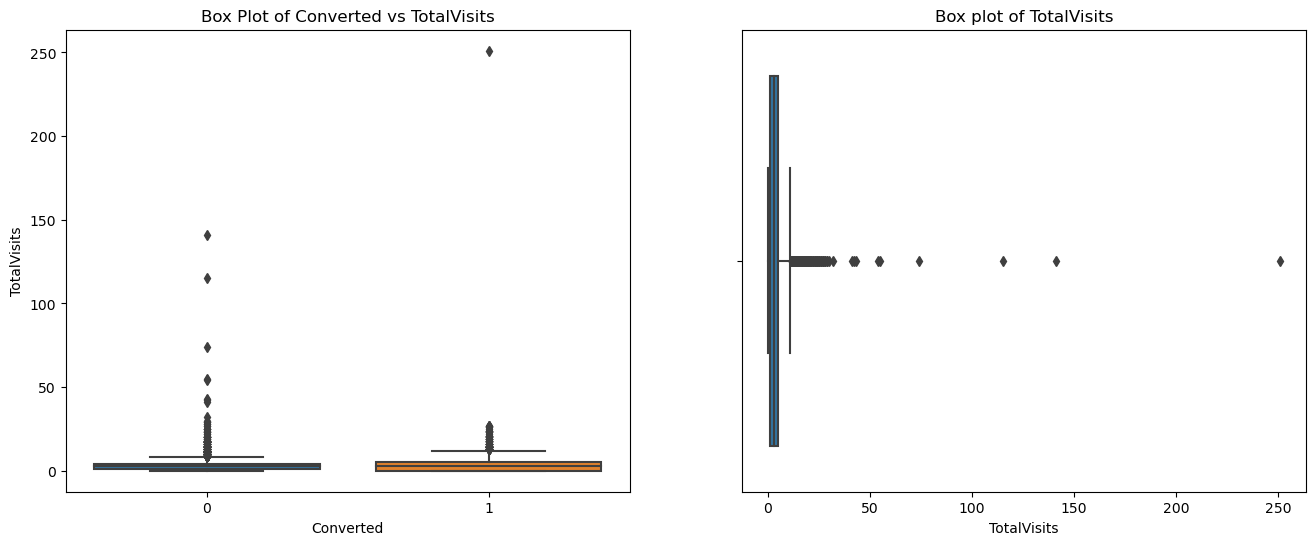

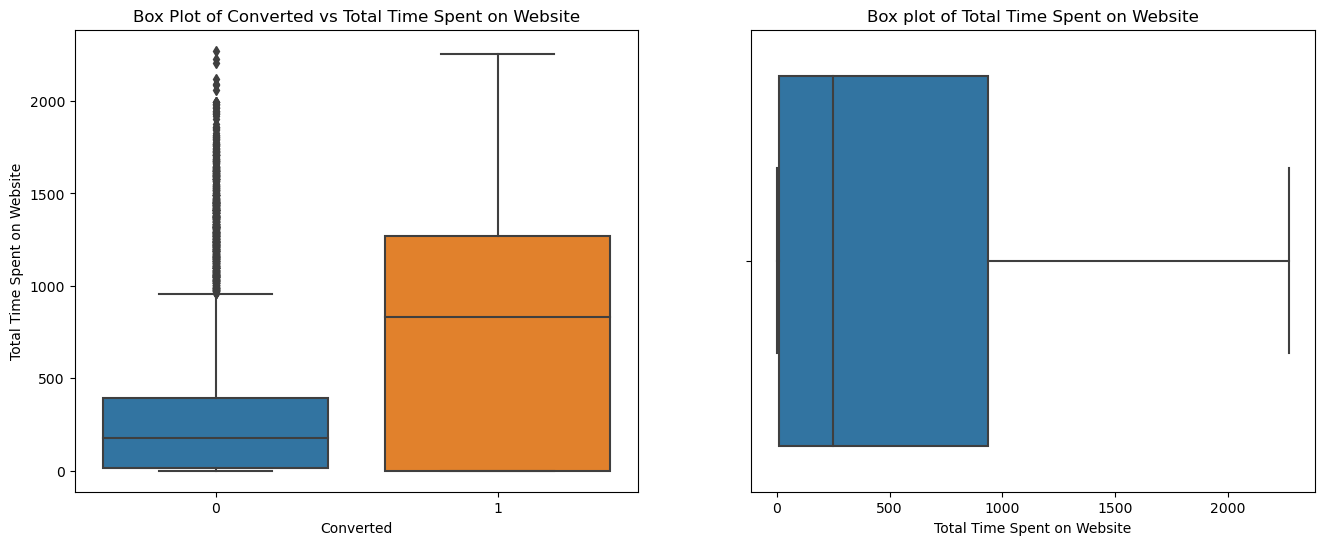

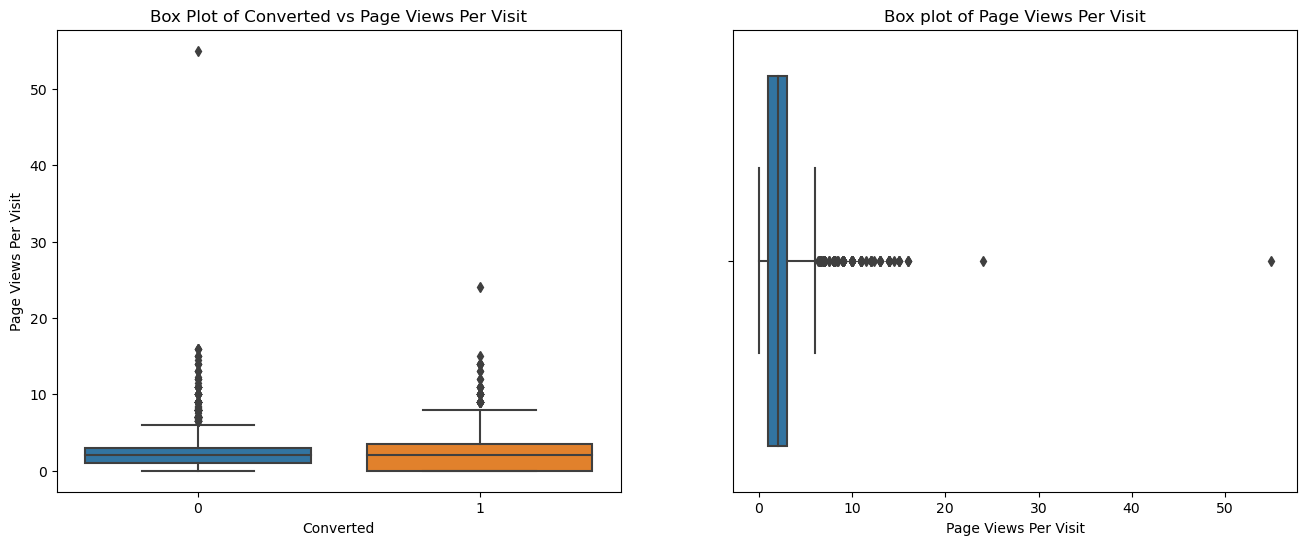

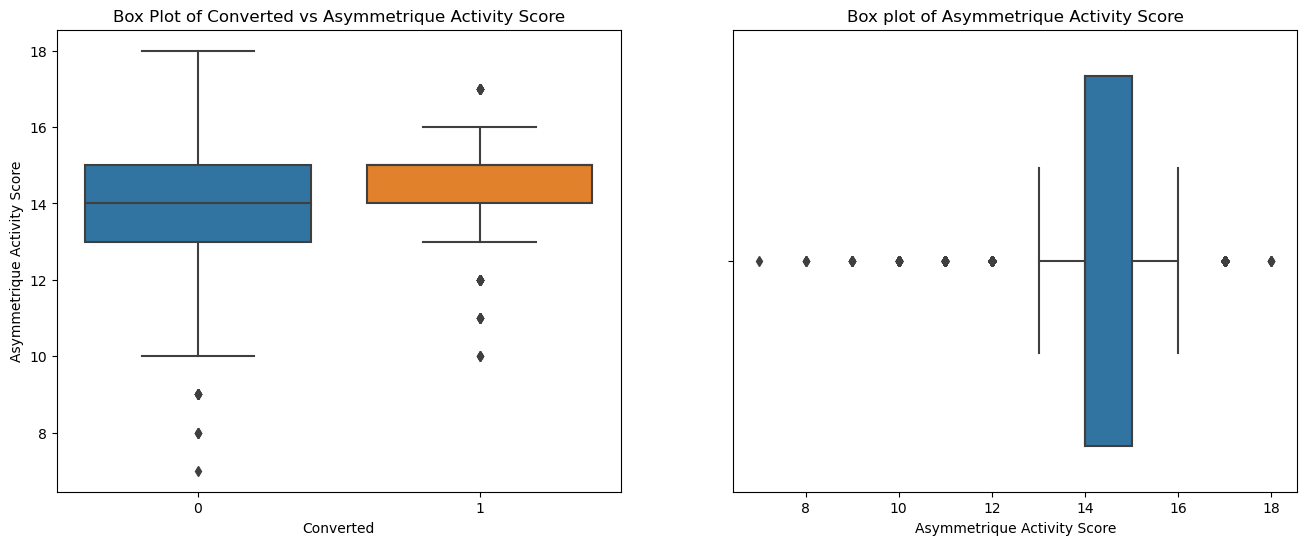

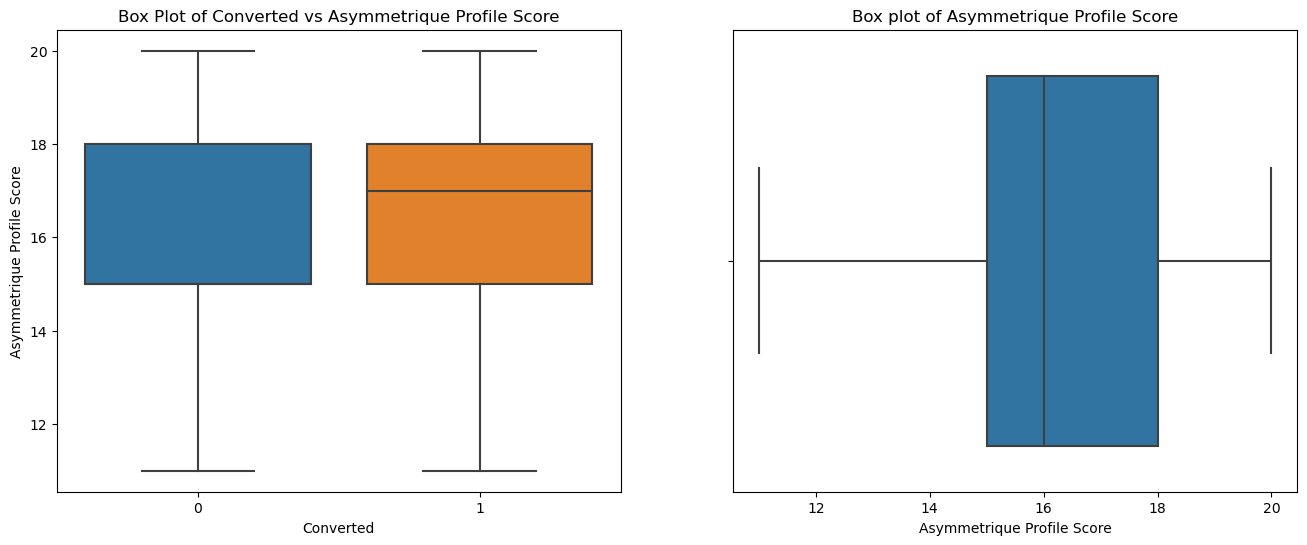

In [16]:
# creating a function for univariate and bi-variate analysis for Numerical columns
def numplot(df, col):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16,6))
    
    sns.boxplot(x = 'Converted',y = col, data = df, ax = ax1)
    ax1.set_title('Box Plot of Converted vs ' + col)
    
    sns.boxplot(df[col], ax = ax2)
    ax2.set_title('Box plot of ' + col)

for colum in num_cols:
    if colum not in ['Lead Number', 'Converted']:
        numplot(lead_data, colum)

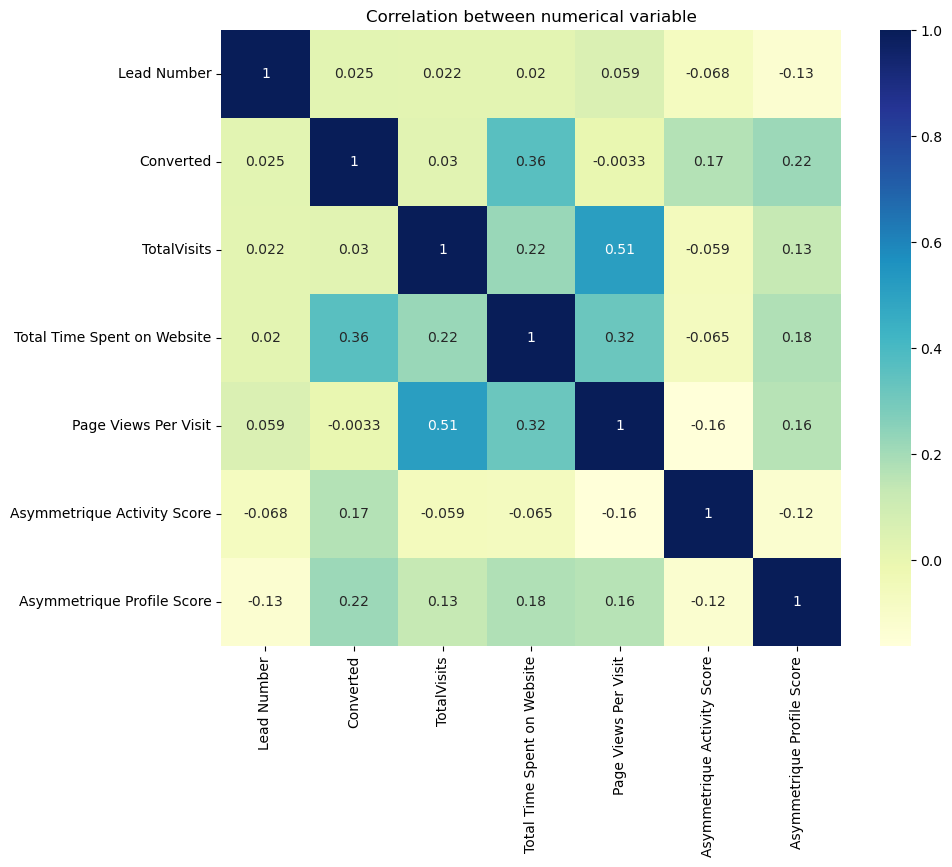

In [17]:
# Bi-variate analysis based on correlation

plt.figure(figsize = (10,8))
sns.heatmap(lead_data[num_cols].corr(), cmap = 'YlGnBu', annot = True)
plt.title('Correlation between numerical variable')
plt.show()

In [18]:
# Checking the percentile of converted and non-converted
lead_num = lead_data[num_cols]
lead_num1 = lead_num[lead_num['Converted'] == 1]
lead_num0 = lead_num[lead_num['Converted'] == 0]

df1 = lead_num0.describe(percentiles = [0,0.05,0.1, 0.25,0.5,0.75,0.9,0.95,1])
df2 = lead_num1.describe(percentiles = [0,0.05,0.1, 0.25,0.5,0.75,0.9,0.95,1])

pd.concat([df1,df2], axis = 1)

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,5679.000000,5679.0,5642.000000,5679.000000,5642.000000,3114.000000,3114.000000,3561.000000,3561.0,3461.000000,3561.000000,3461.000000,1908.000000,1908.000000
mean,616722.197570,0.0,3.329670,330.404473,2.368453,14.123956,16.035003,617931.981185,1.0,3.633632,738.546757,2.353638,14.603774,16.850629
std,23779.666878,0.0,4.359668,432.231915,2.175058,1.592037,1.672051,22780.974851,0.0,5.564011,615.656010,2.139276,0.884657,1.913772
min,579545.000000,0.0,0.000000,0.000000,0.000000,7.000000,11.000000,579533.000000,1.0,0.000000,0.000000,0.000000,10.000000,11.000000
0%,579545.000000,0.0,0.000000,0.000000,0.000000,7.000000,11.000000,579533.000000,1.0,0.000000,0.000000,0.000000,10.000000,11.000000
5%,582776.800000,0.0,0.000000,0.000000,0.000000,11.650000,13.000000,583055.000000,1.0,0.000000,0.000000,0.000000,13.000000,14.000000
10%,585933.200000,0.0,0.000000,0.000000,0.000000,12.000000,14.000000,587146.000000,1.0,0.000000,0.000000,0.000000,14.000000,15.000000
25%,595729.000000,0.0,1.000000,16.000000,1.000000,13.000000,15.000000,598110.000000,1.0,0.000000,0.000000,0.000000,14.000000,15.000000
50%,614218.000000,0.0,3.000000,179.000000,2.000000,14.000000,15.000000,617035.000000,1.0,3.000000,832.000000,2.000000,15.000000,17.000000
75%,637381.500000,0.0,4.000000,393.000000,3.000000,15.000000,18.000000,637409.000000,1.0,5.000000,1268.000000,3.500000,15.000000,18.000000


In [19]:
round(lead_data[num_cols].isnull().sum()/len(lead_data)*100,1)

Lead Number                     0.0
Converted                       0.0
TotalVisits                     1.5
Total Time Spent on Website     0.0
Page Views Per Visit            1.5
Asymmetrique Activity Score    45.6
Asymmetrique Profile Score     45.6
dtype: float64

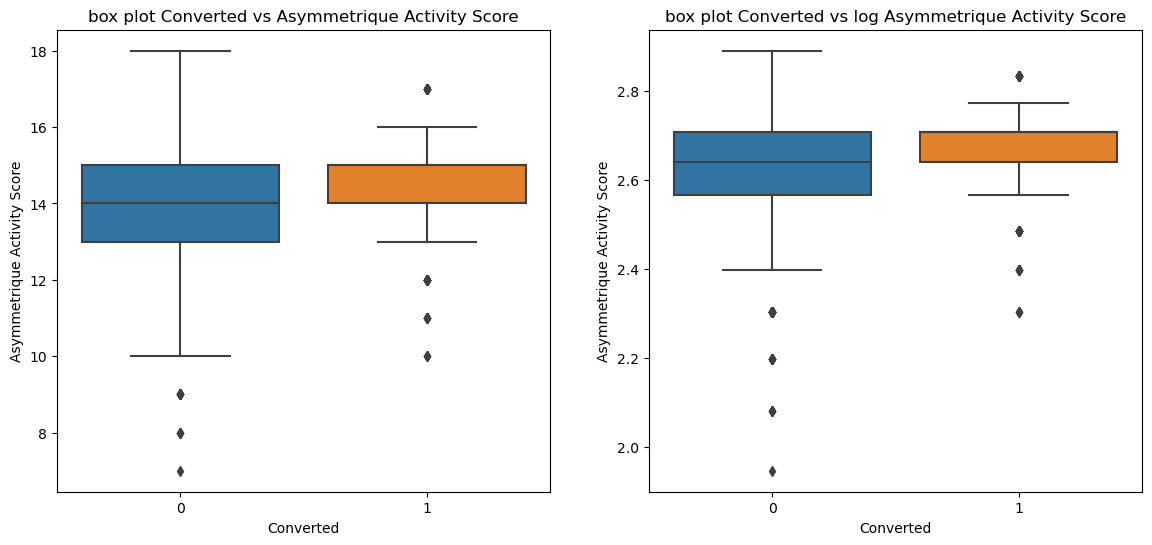

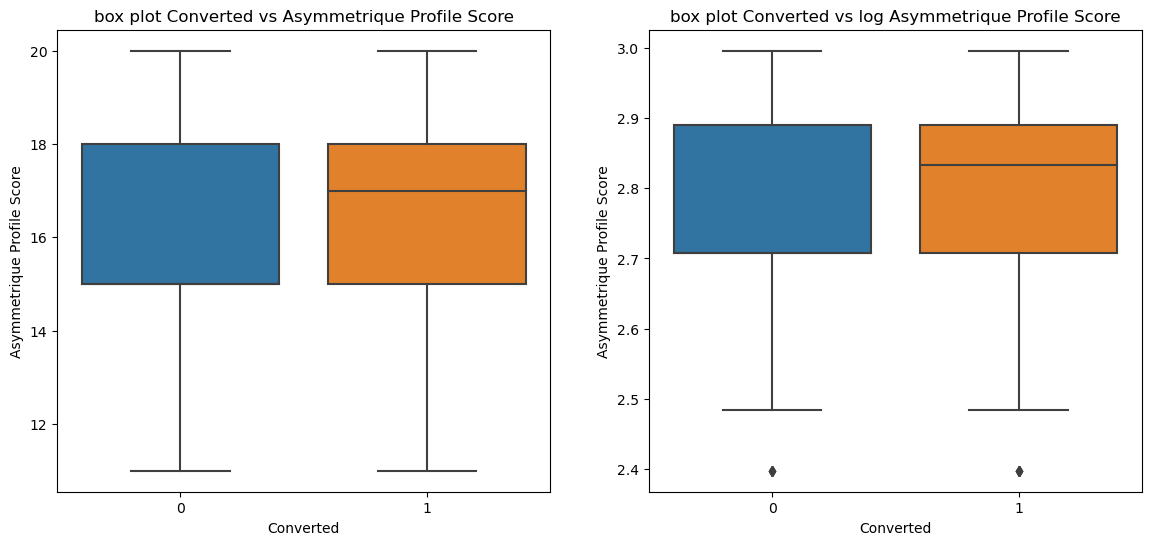

In [20]:
def numplot(df, col):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize = (14,6))
    
    sns.boxplot(x = 'Converted',y = col, data = df, ax = ax1)
    ax1.set_title('box plot Converted vs ' + col)
    
    sns.boxplot(x = df['Converted'], y = np.log(df[col]), ax = ax2)
    ax2.set_title('box plot Converted vs log ' + col)


numplot(lead_data, 'Asymmetrique Activity Score')


numplot(lead_data, 'Asymmetrique Profile Score')

### Univariate and Bivariate analysis of the categorical columns

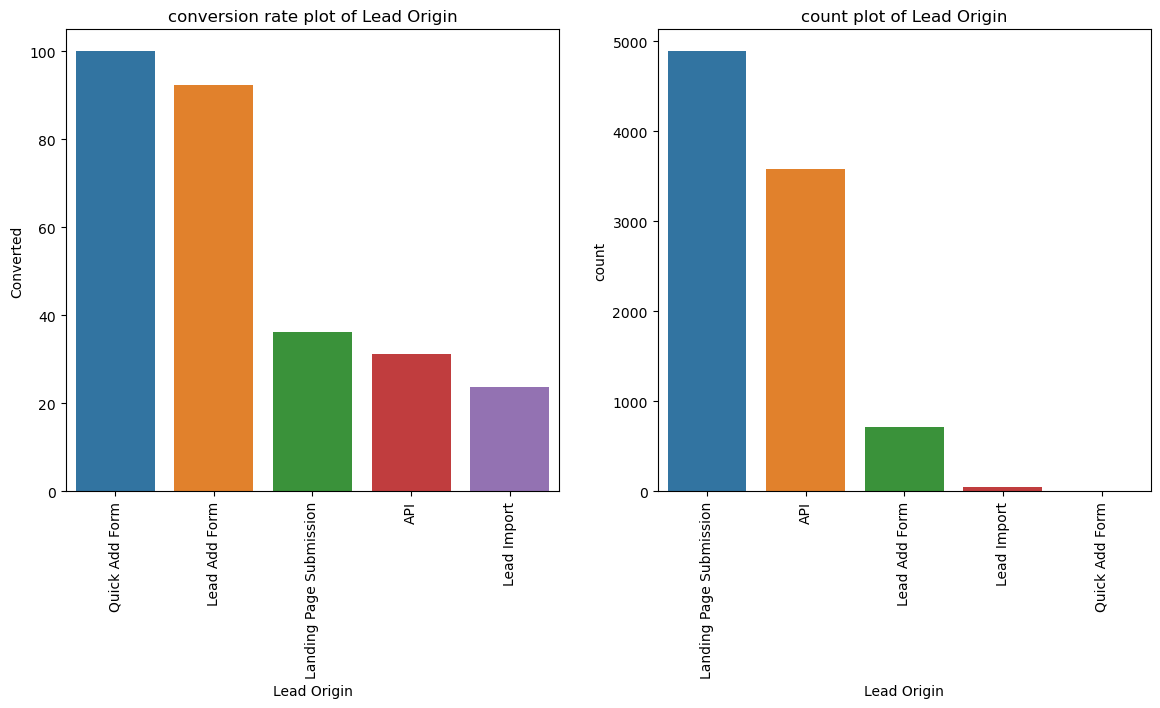

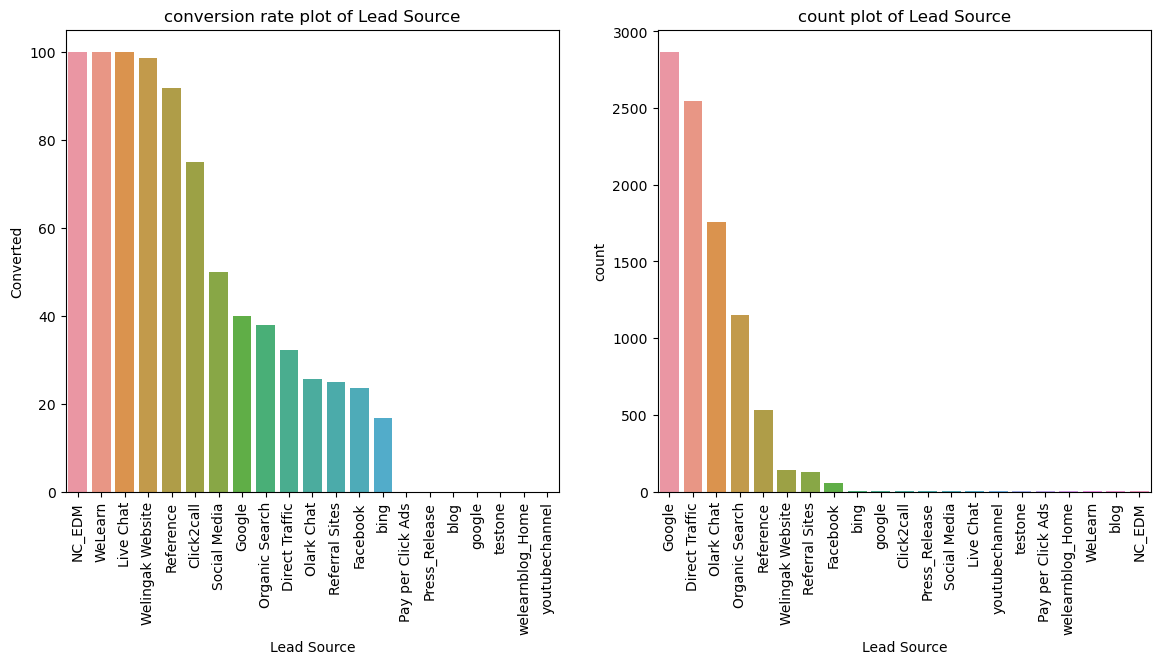

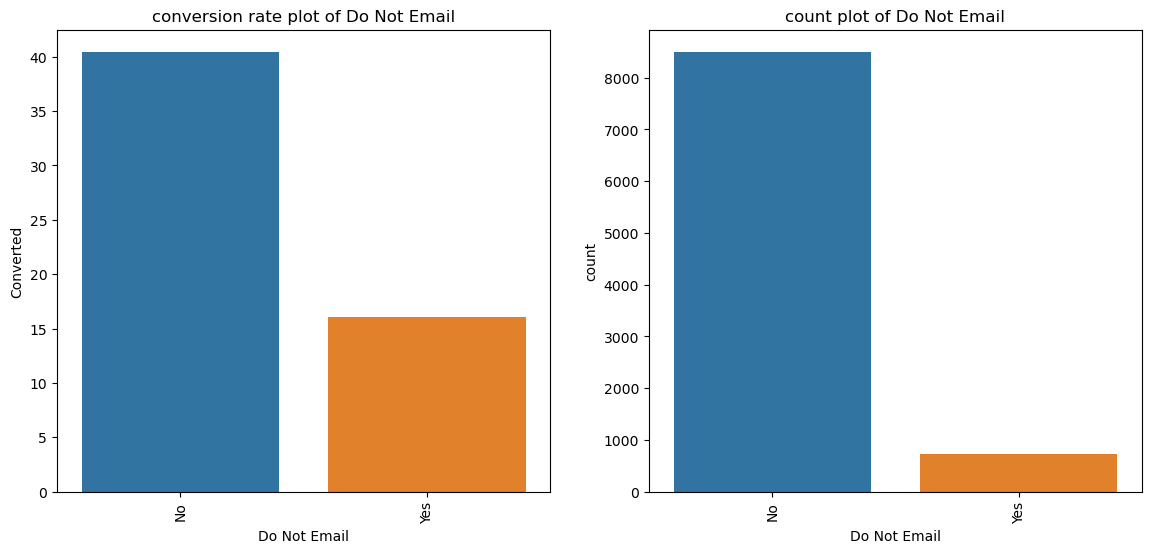

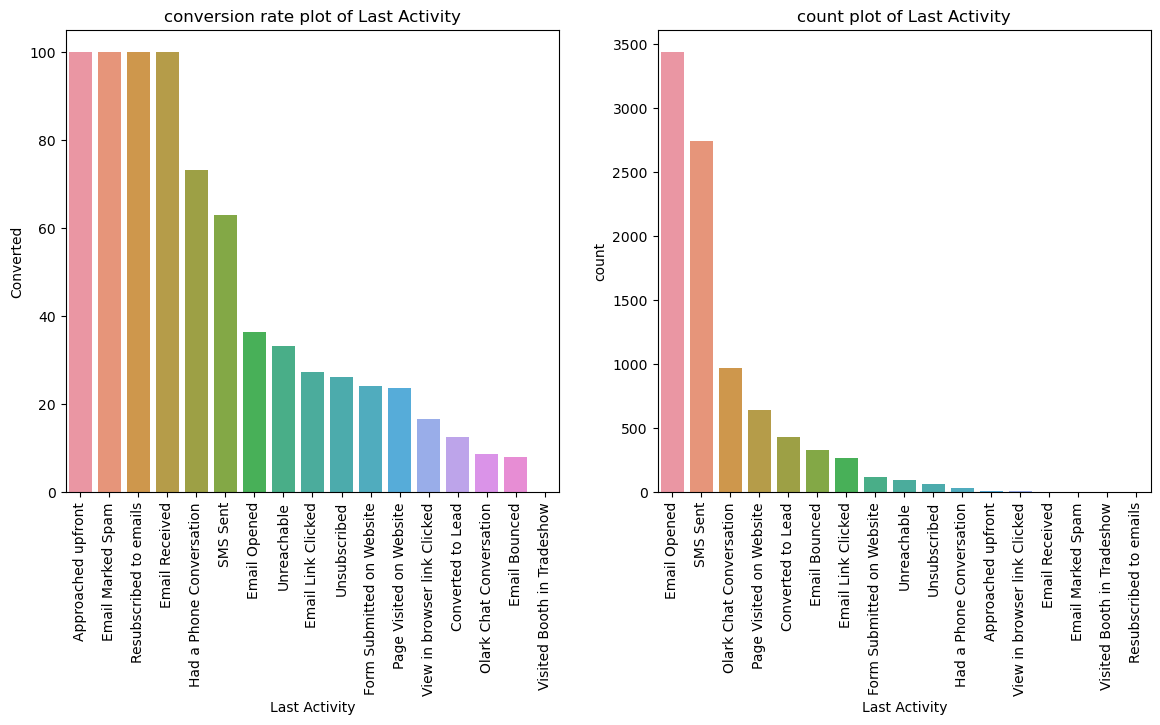

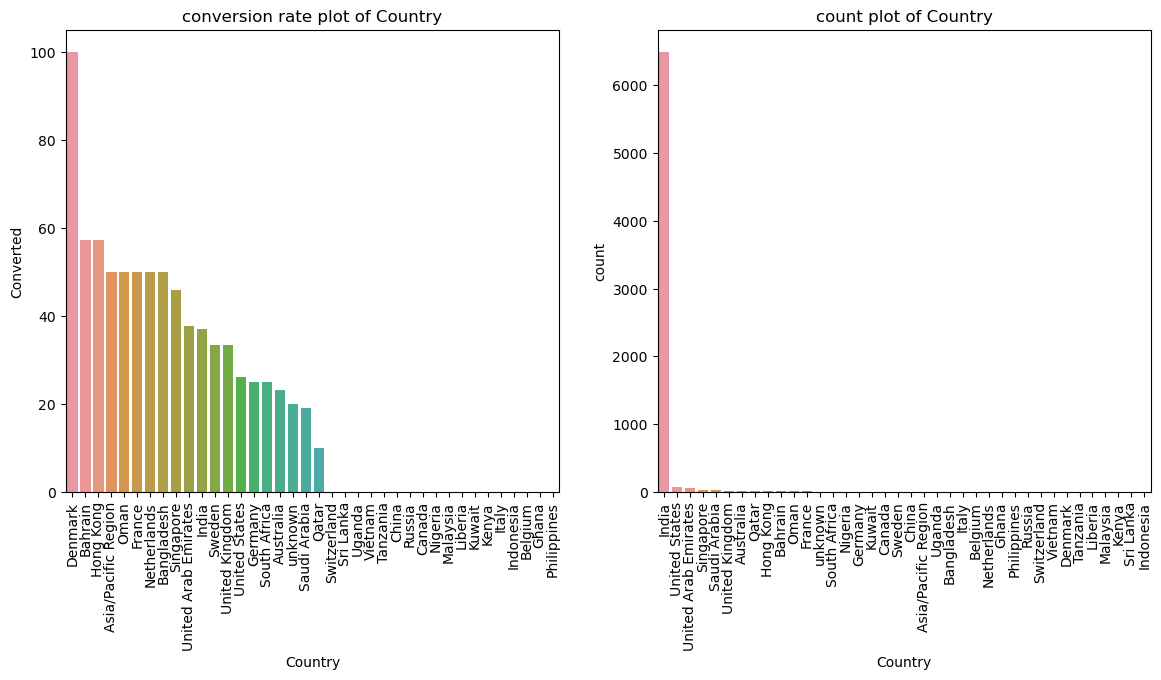

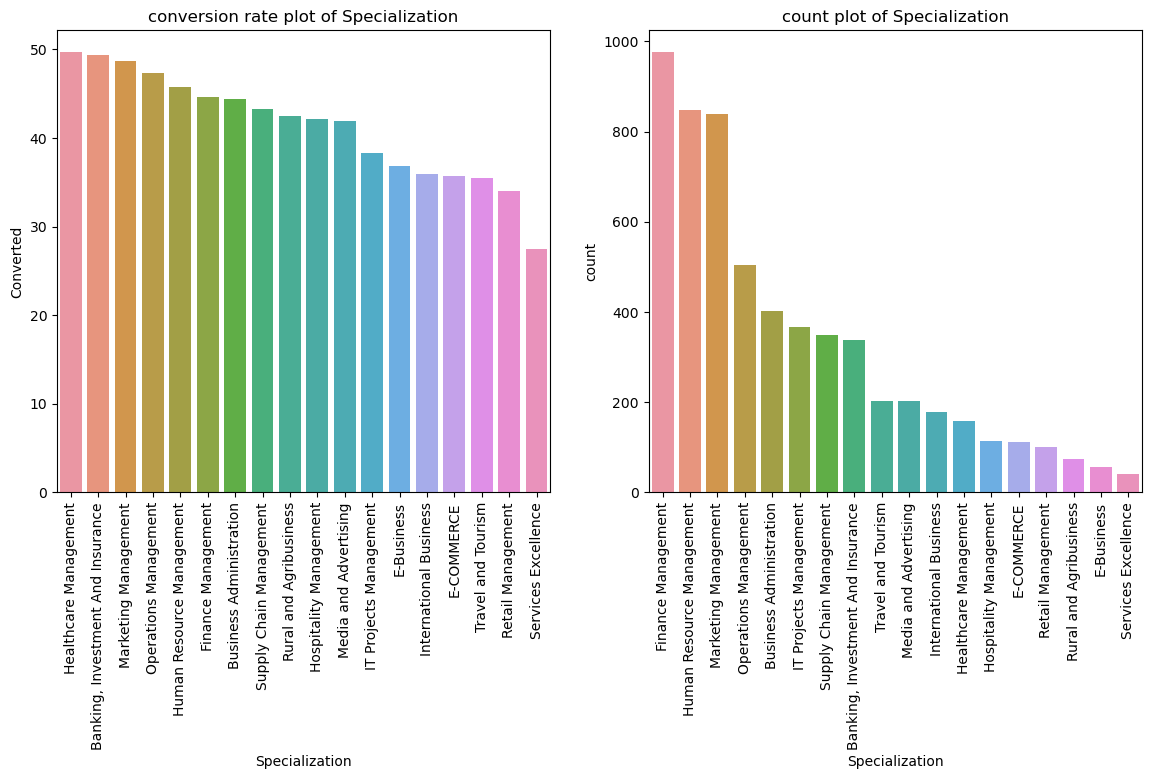

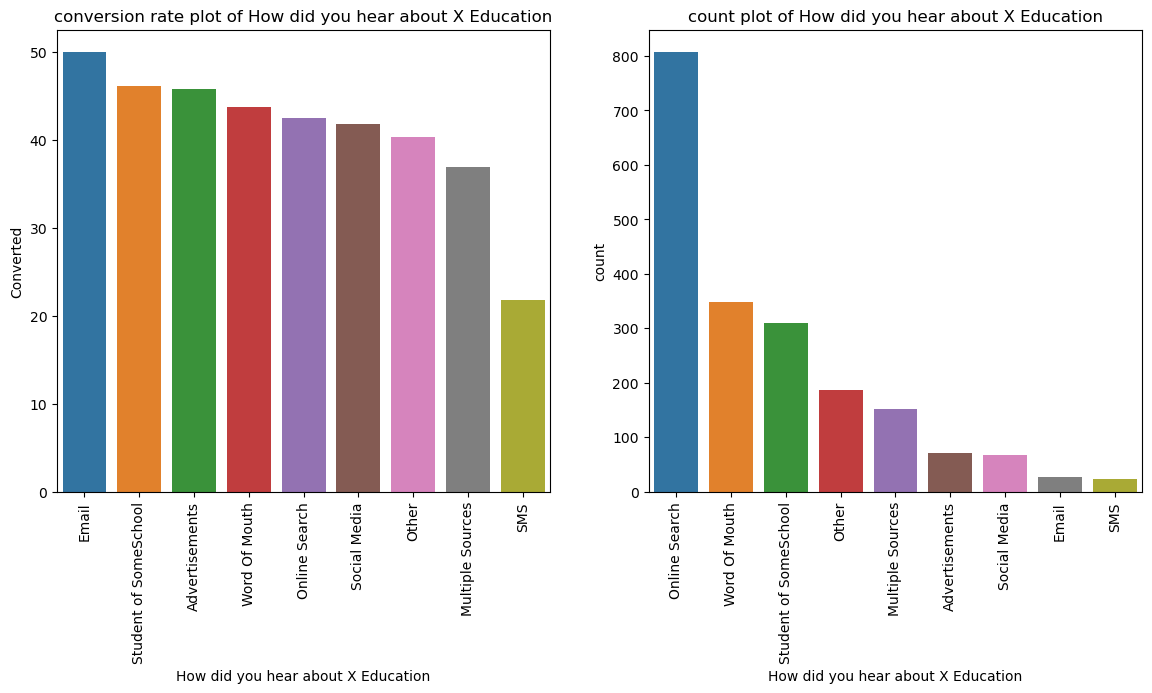

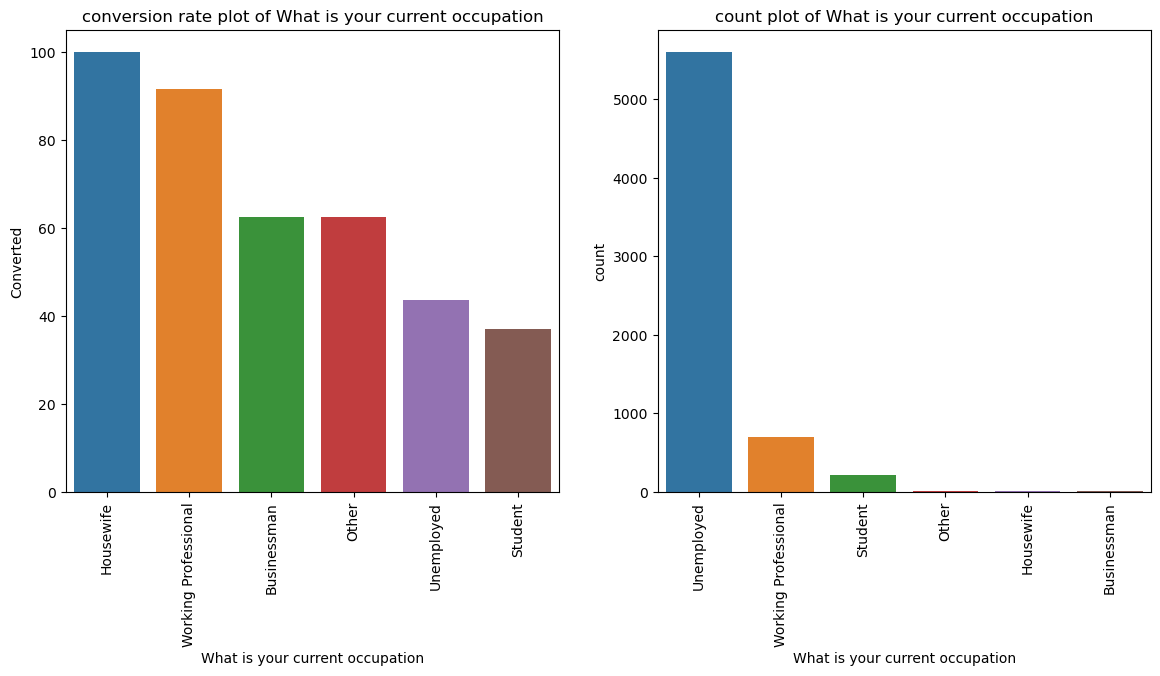

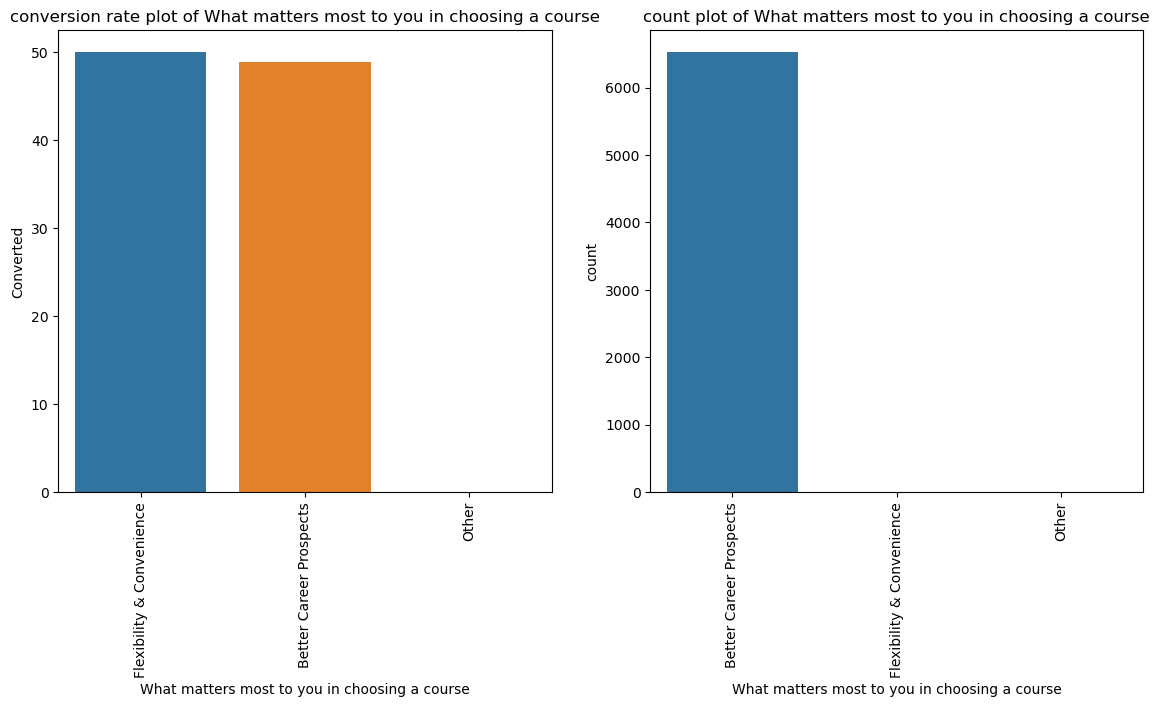

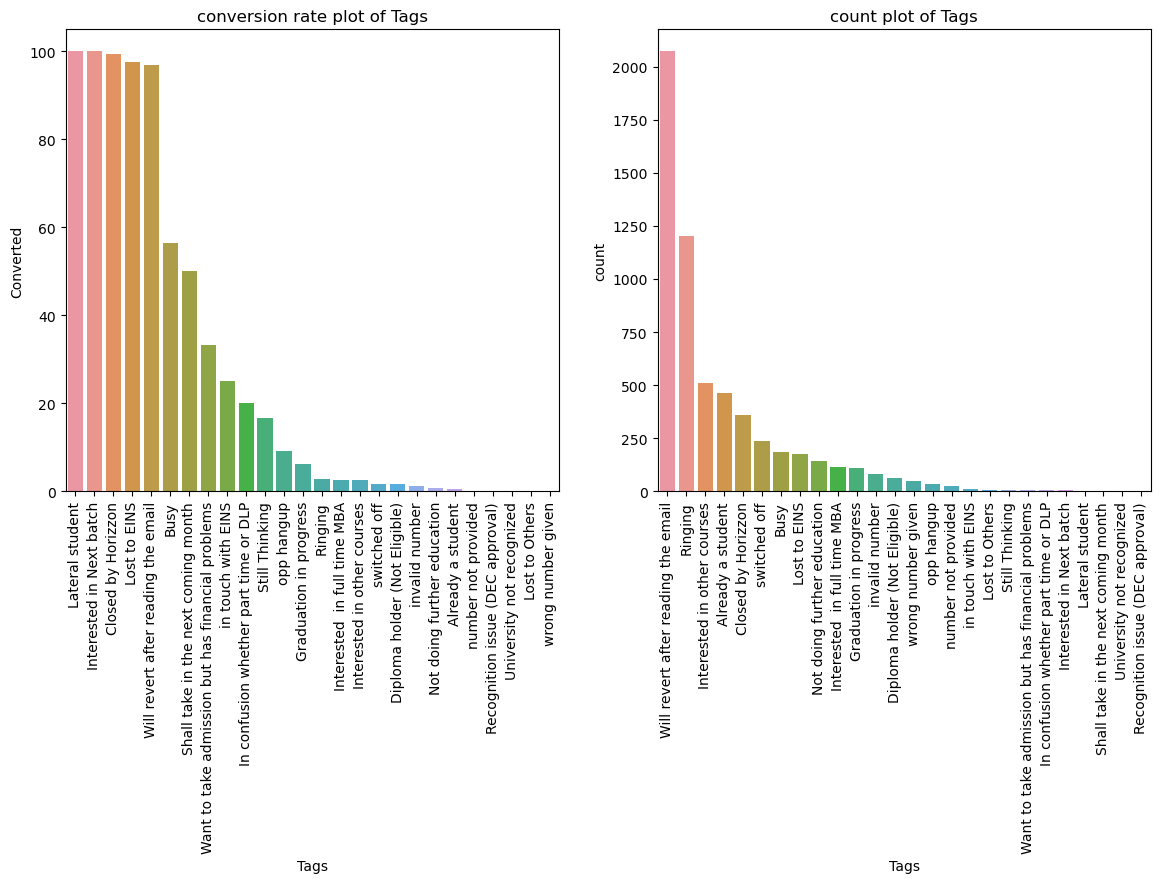

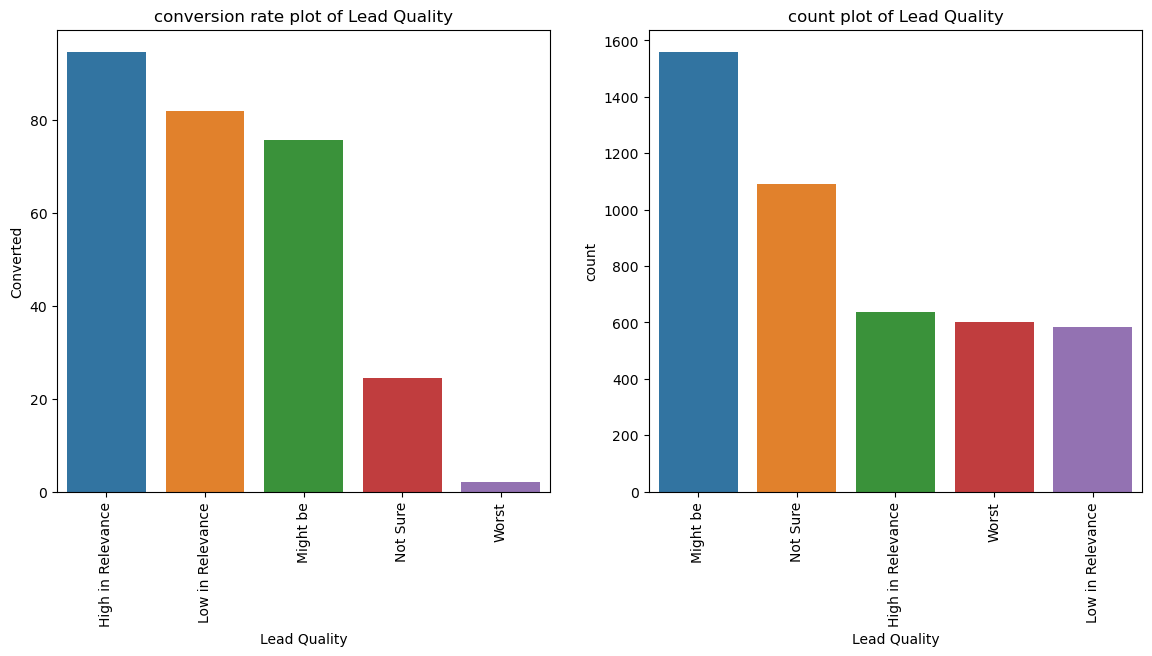

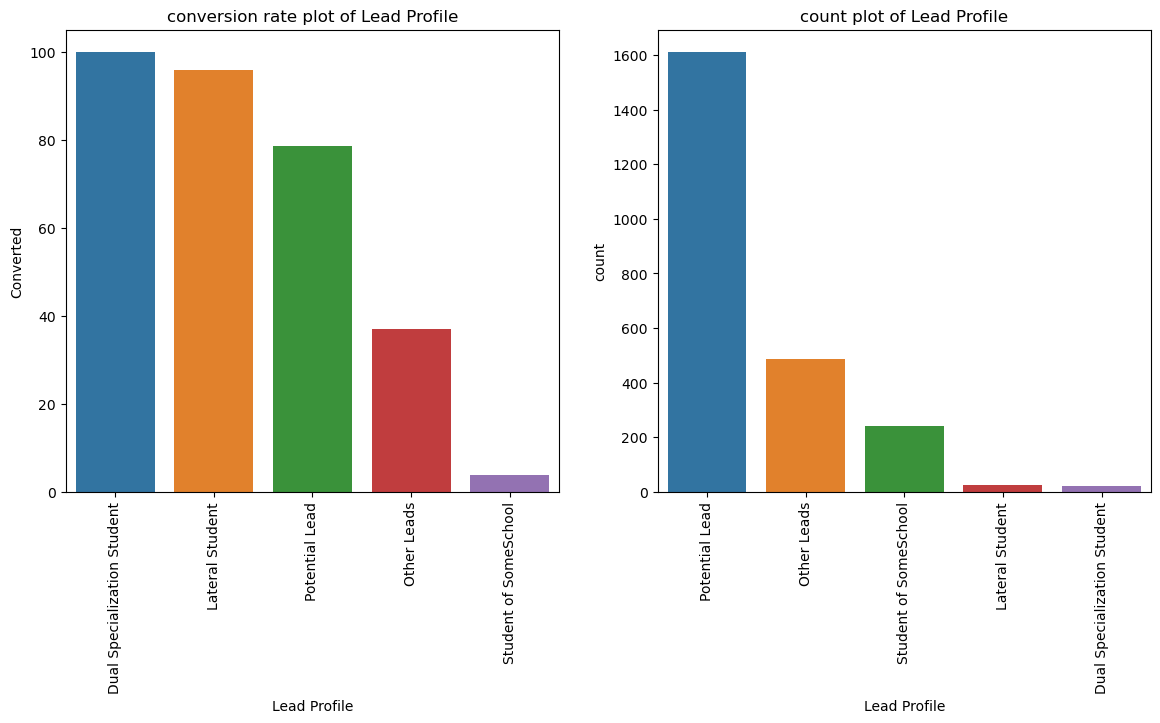

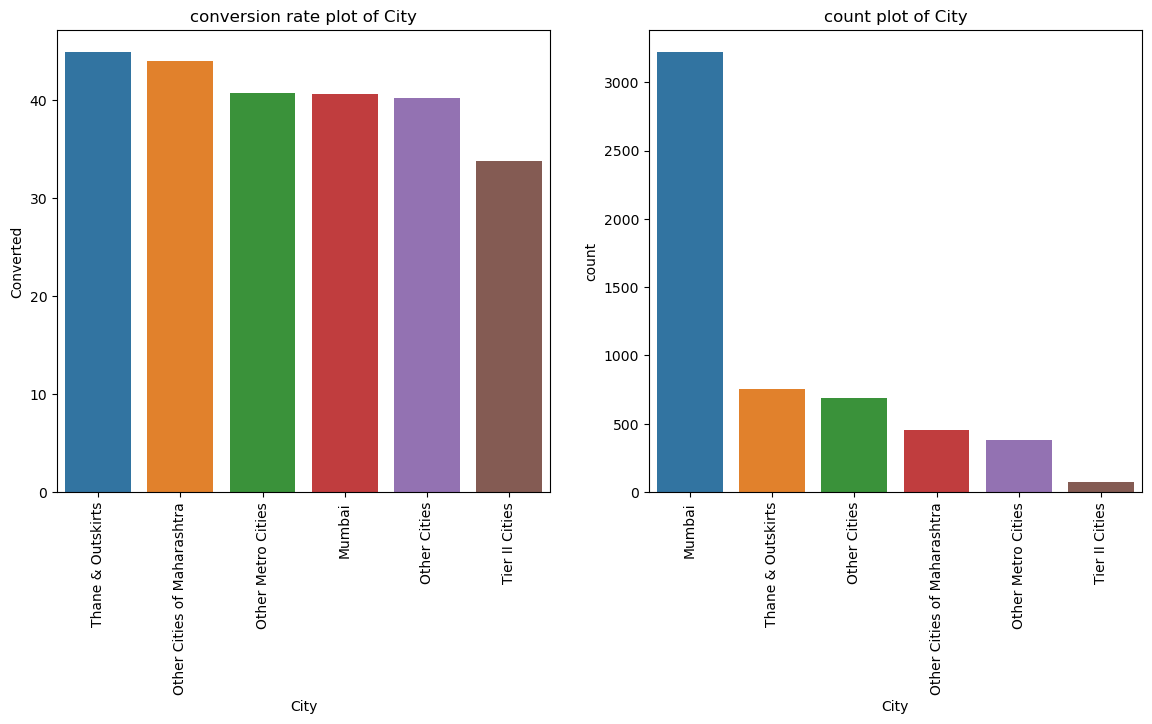

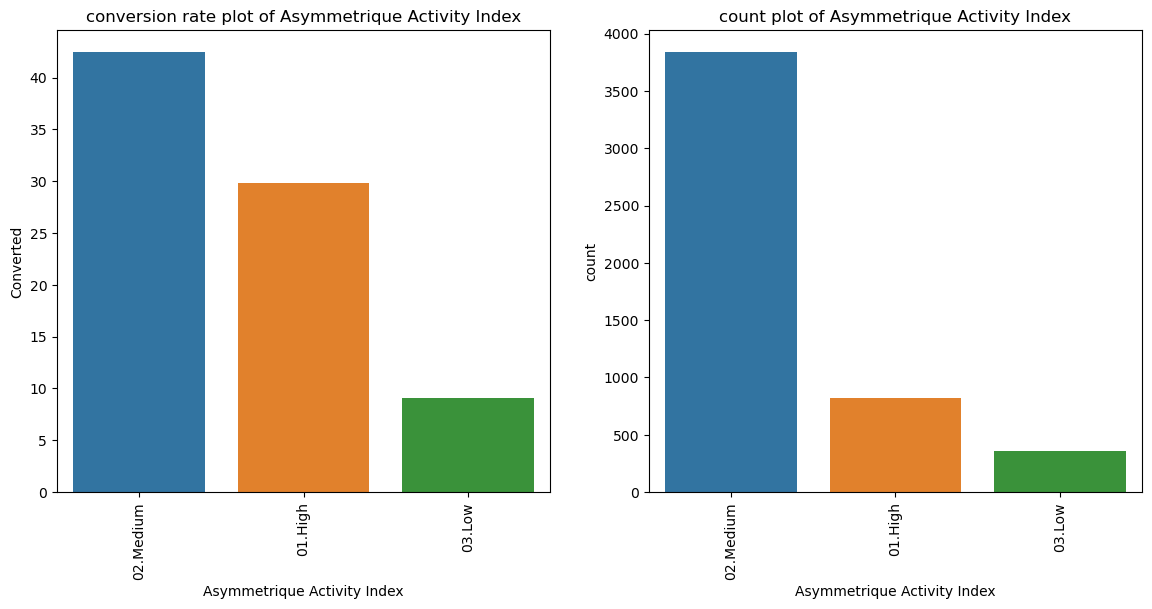

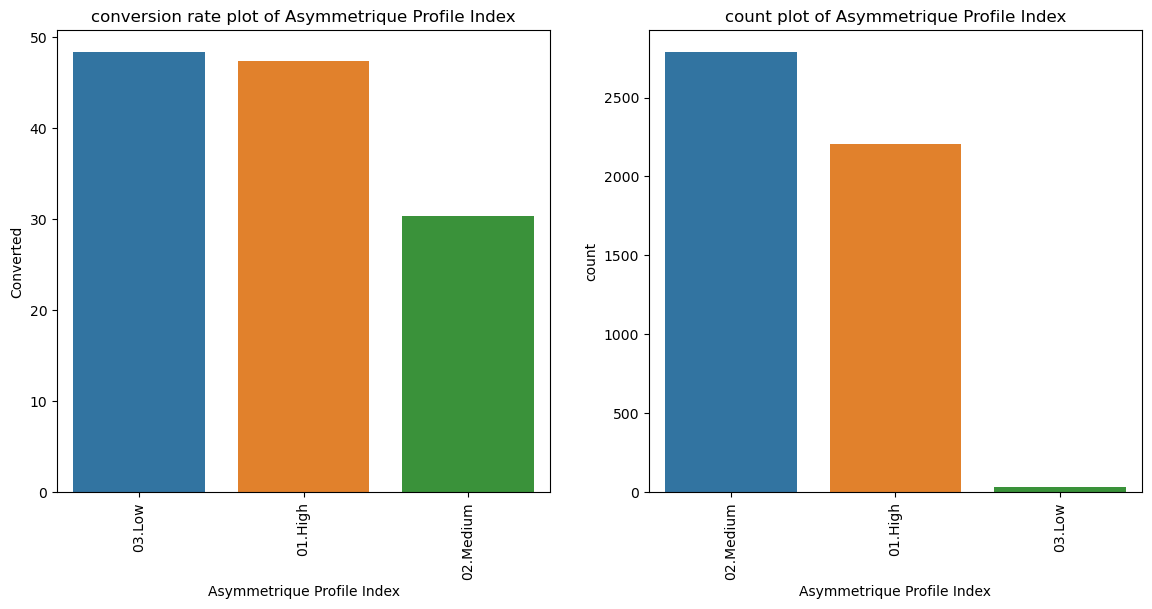

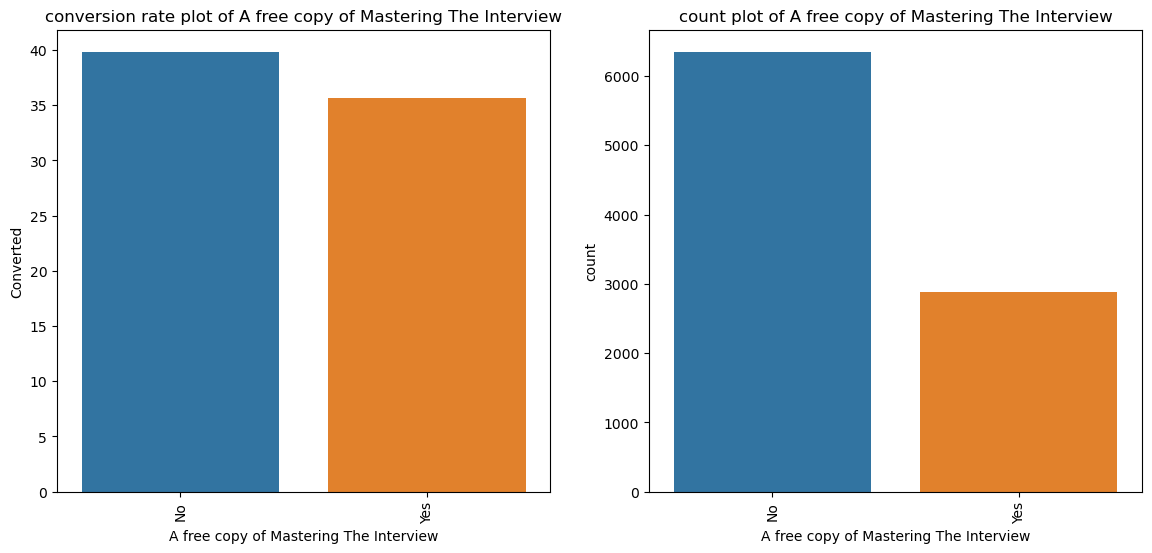

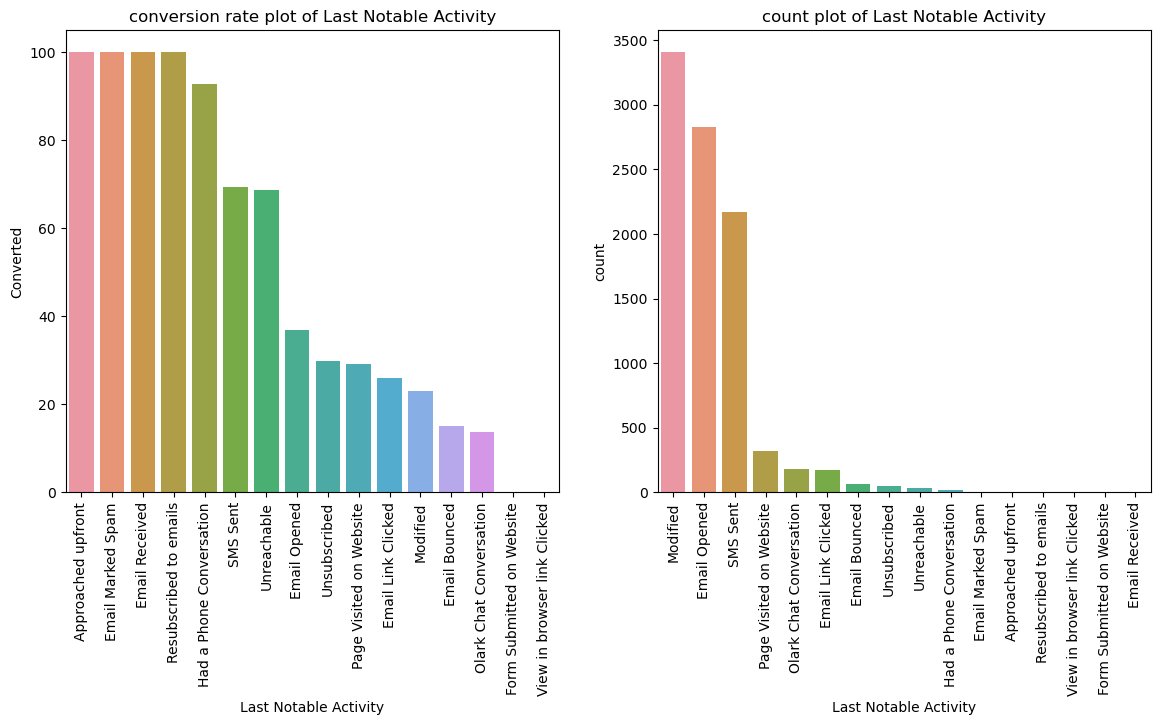

In [21]:
# appending 'Converted' to object _columns
obj_cols.append('Converted')


# creating a function for visualization of category columns 
def catplot(df, col):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize = (14,6))
    
    # countplots for each unique value in columns
    sns.countplot(x=col,data = df, ax = ax2, order = df[col].value_counts().index)
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
    ax2.set_title('count plot of '+ col)
    
    # plots for conversion rate for each unique value in column
    dummy = pd.DataFrame(df.groupby(col).mean()['Converted']*100).reset_index()
    dummy = dummy.sort_values('Converted', ascending = False)
    sns.barplot(x = dummy[col], y = dummy['Converted'], ax = ax1)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
    ax1.set_title('conversion rate plot of '+col)

# univariate and bi-variate analysis of category columns
for colum in obj_cols:
    if colum not in ["Prospect ID", 'Converted']:
        catplot(lead_data, colum)

### Treating NaN values in numeric columns

In [22]:
# checking percent null values in numeric columns
round(lead_data[num_cols].isnull().sum()/len(lead_data)*100,1)

Lead Number                     0.0
Converted                       0.0
TotalVisits                     1.5
Total Time Spent on Website     0.0
Page Views Per Visit            1.5
Asymmetrique Activity Score    45.6
Asymmetrique Profile Score     45.6
dtype: float64

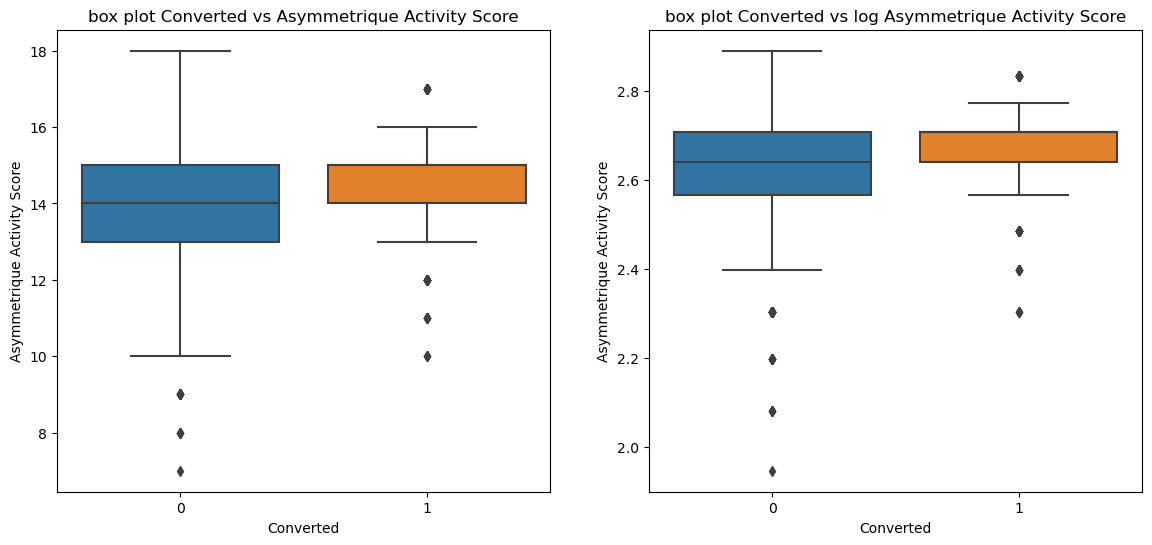

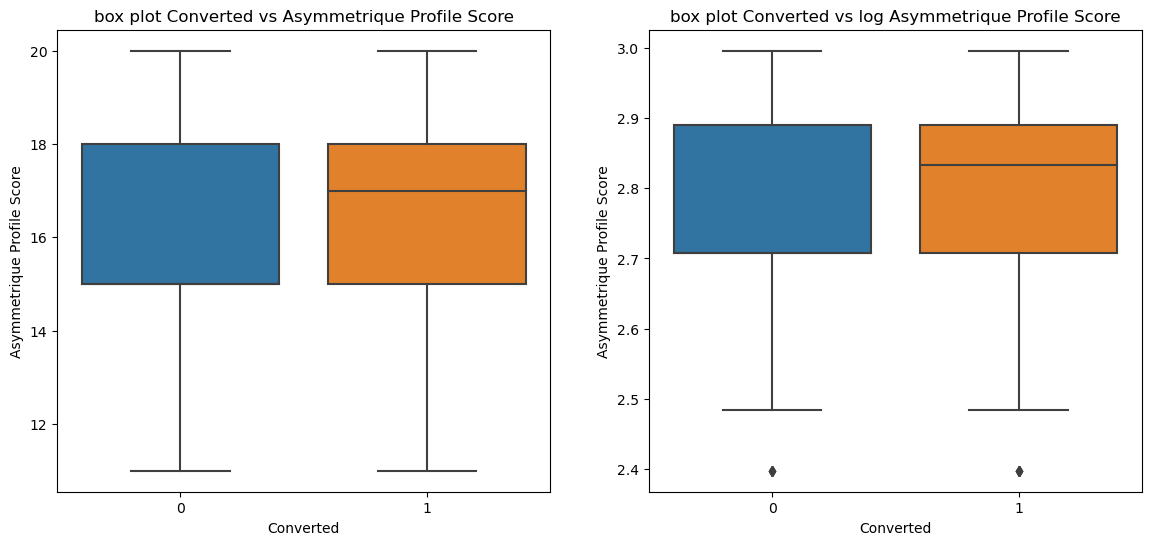

In [23]:
# lets analyse Asymmetrique Activity Score and Asymmetrique Profile Score columns further
# plot for Asymmetrique Activity Score
numplot(lead_data, 'Asymmetrique Activity Score')

# plot for Asymmetrique Activity Score
numplot(lead_data, 'Asymmetrique Profile Score')

In [24]:
# we can safely remove these columns as these doesn't vary much with respect to Converted Column
# removing the cols having nan values in TotalVisits and Pageviewspervisit
for col in ['TotalVisits', 'Page Views Per Visit']:
    lead_data = lead_data[~lead_data[col].isnull()]

# dropping 'Asymmetrique Activity Score','Asymmetrique Profile Score' 
for col in num_cols:
    if col.find('Asymmetrique') != -1:
        lead_data = lead_data.drop(col, axis = 1)
        
# checking for nan values in num_cols
num_cols.remove('Asymmetrique Activity Score')
num_cols.remove('Asymmetrique Profile Score')

lead_data[num_cols].isnull().sum()

Lead Number                    0
Converted                      0
TotalVisits                    0
Total Time Spent on Website    0
Page Views Per Visit           0
dtype: int64

### Treating nan values of categorical columns and dropping some cols based on nan values and EDA

In [25]:
# analysing percentage missing values
lead_data[obj_cols].isnull().sum()/len(lead_data)*100

Prospect ID                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.318576
Do Not Email                                      0.000000
Last Activity                                     0.000000
Country                                          25.530045
Specialization                                   36.295727
How did you hear about X Education               78.150060
What is your current occupation                  29.473800
What matters most to you in choosing a course    29.682522
Tags                                             36.614303
Lead Quality                                     51.949907
Lead Profile                                     74.491926
City                                             39.547402
Asymmetrique Activity Index                      45.787103
Asymmetrique Profile Index                       45.787103
A free copy of Mastering The Interview            0.0000

In [26]:
# identifying object columns having nan values
null_obj_cols = lead_data[obj_cols].isnull().sum()/len(lead_data)*100
null_obj_cols = list(null_obj_cols[null_obj_cols > 0].index)

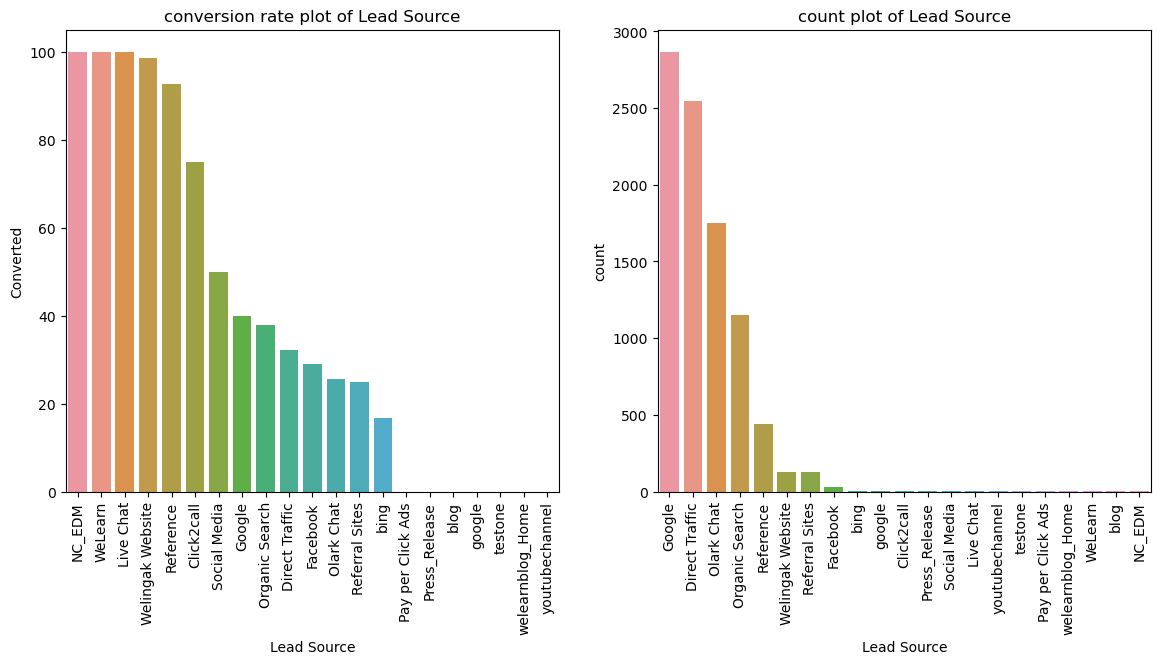

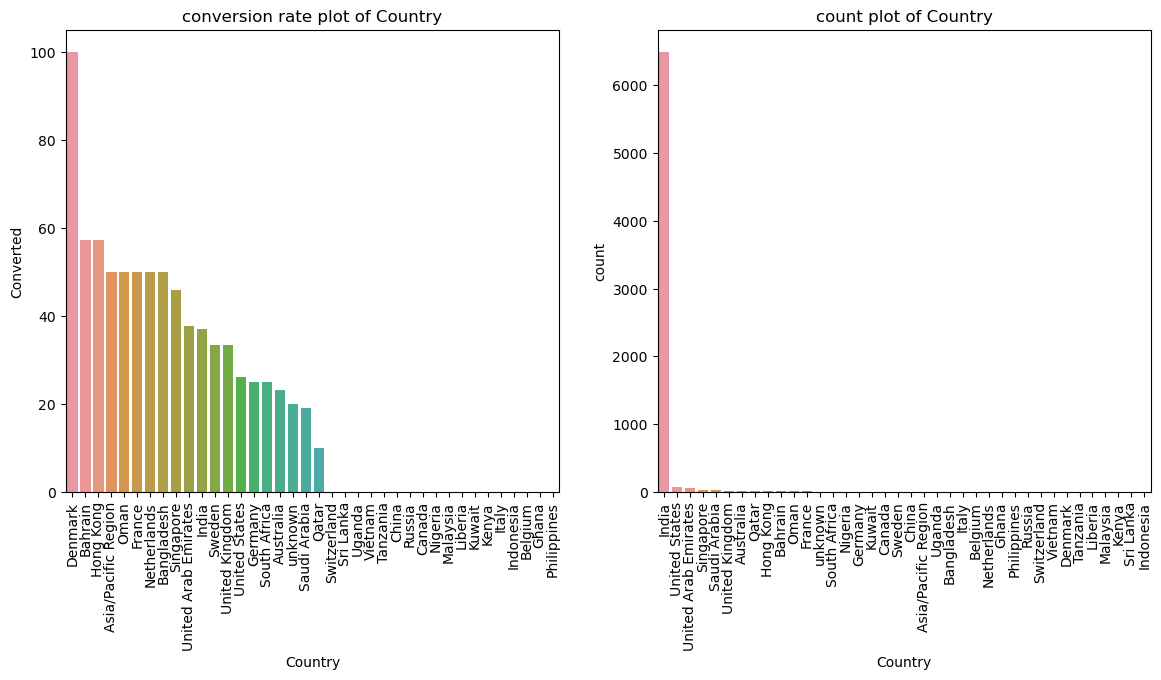

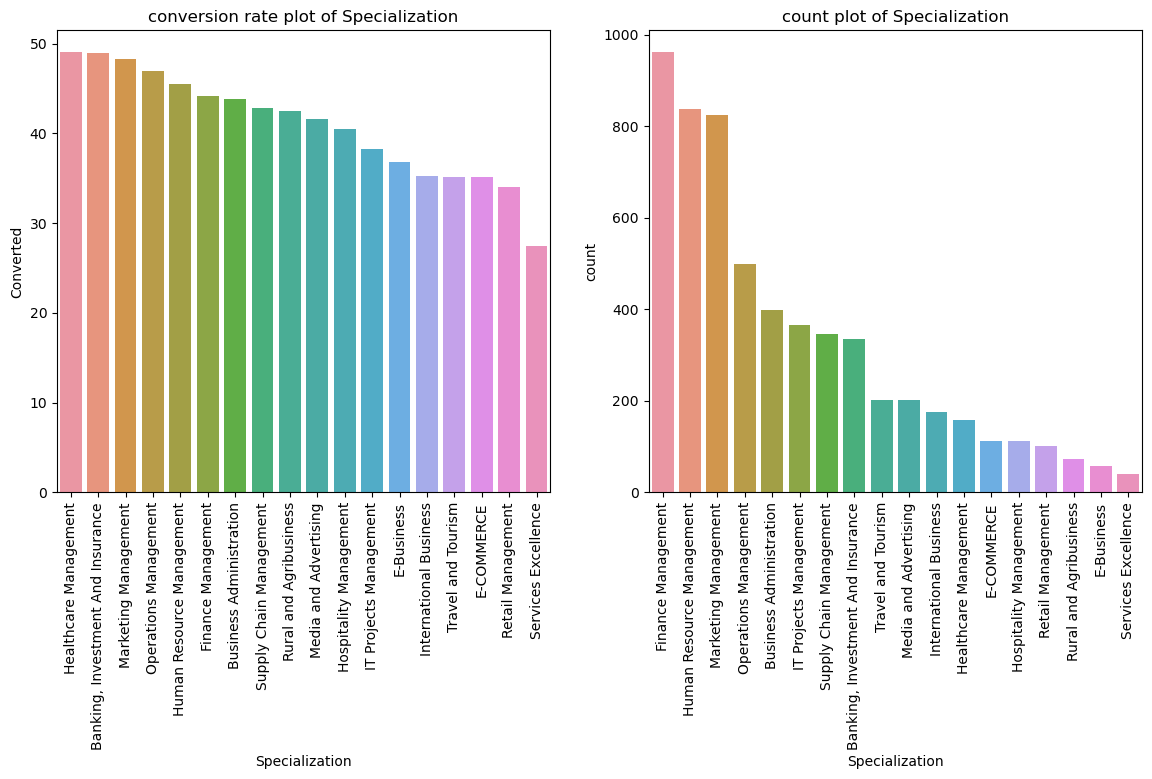

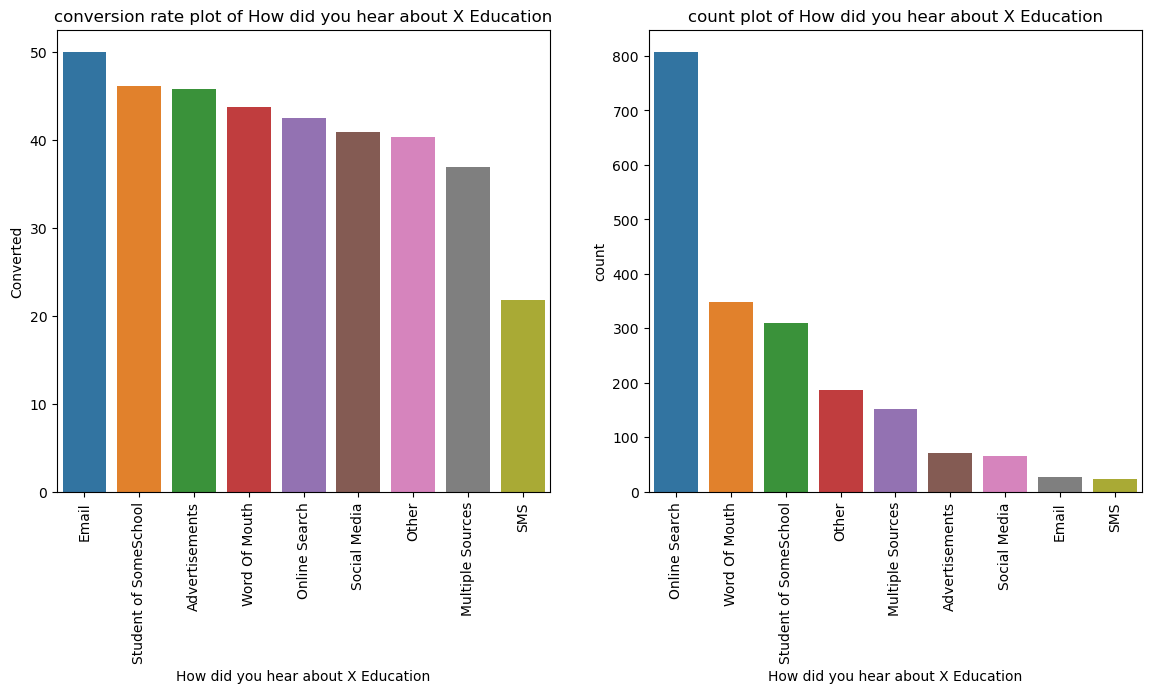

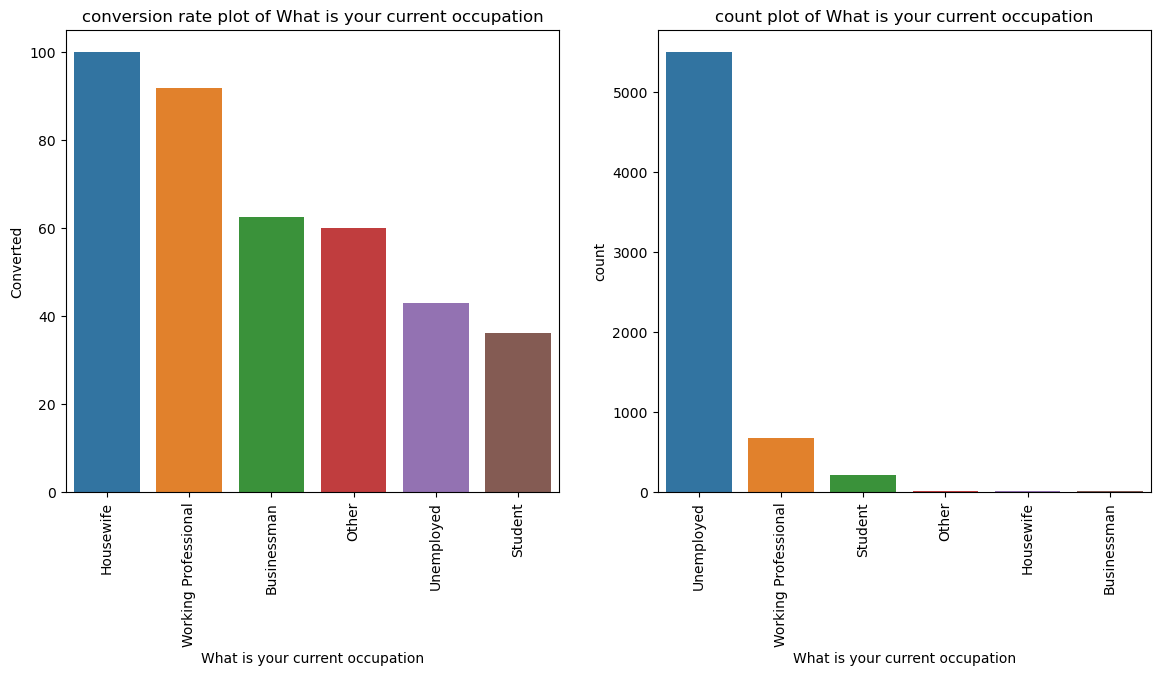

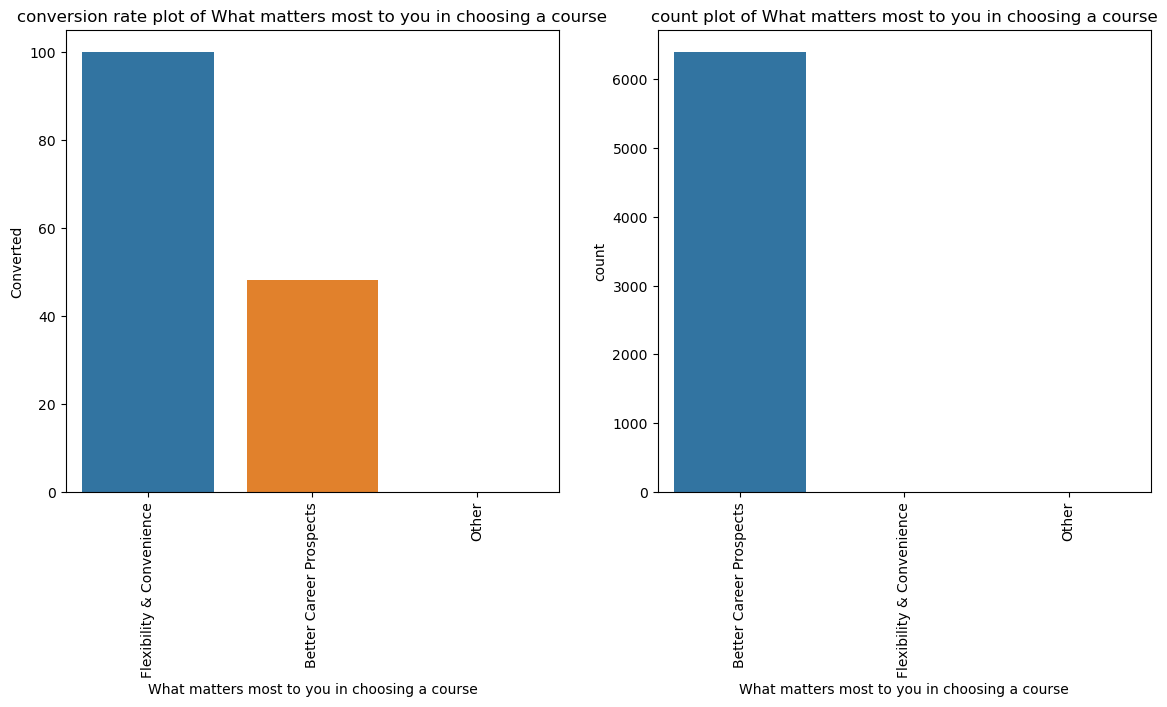

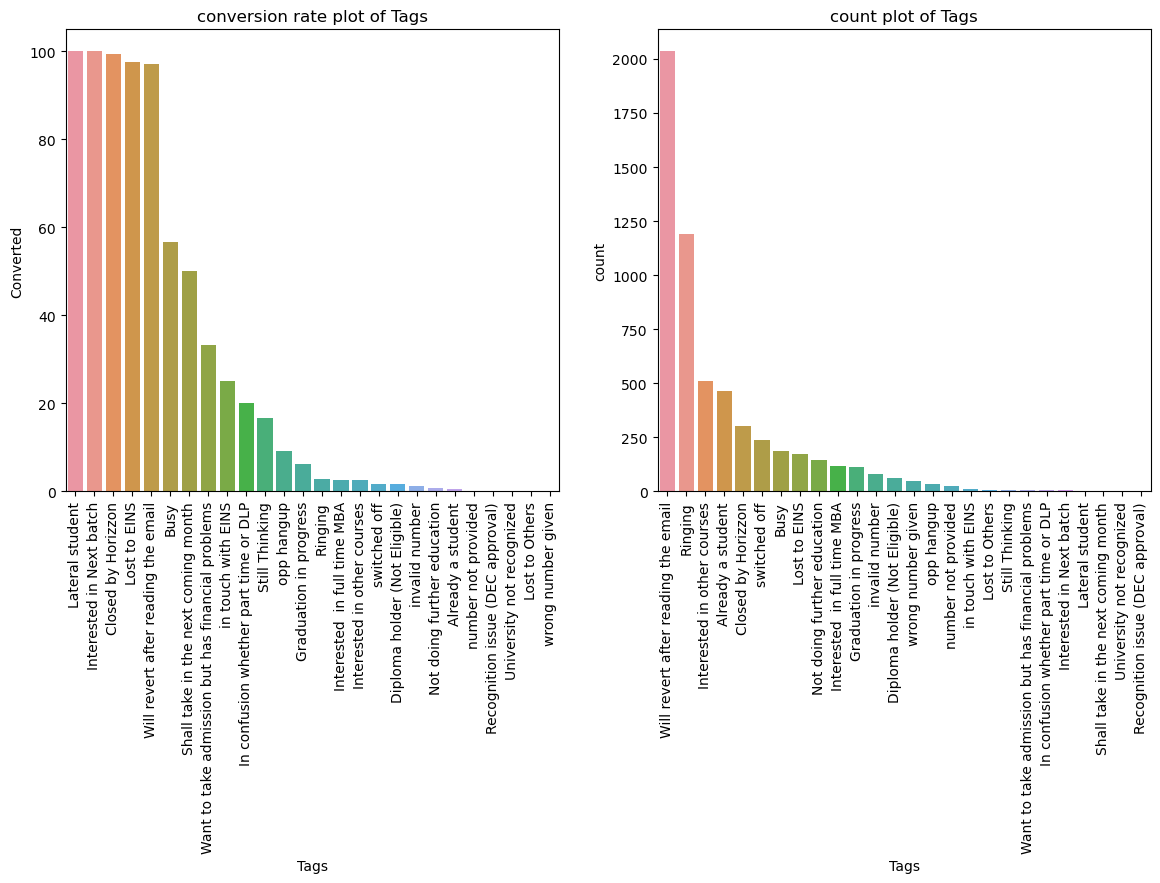

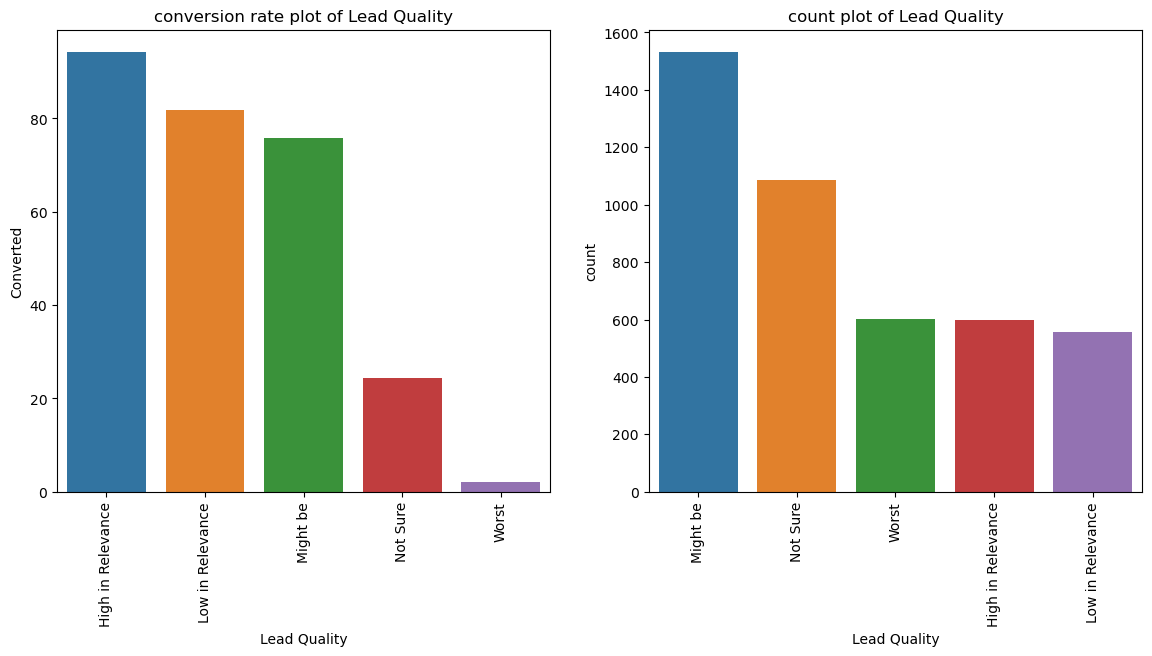

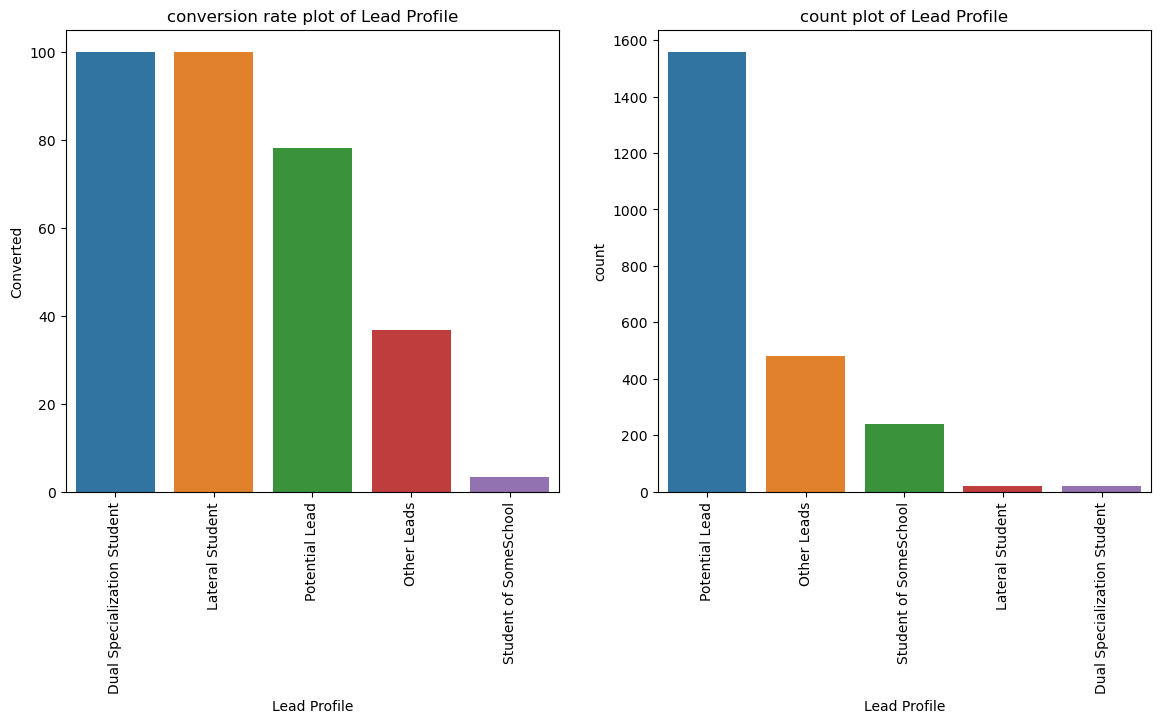

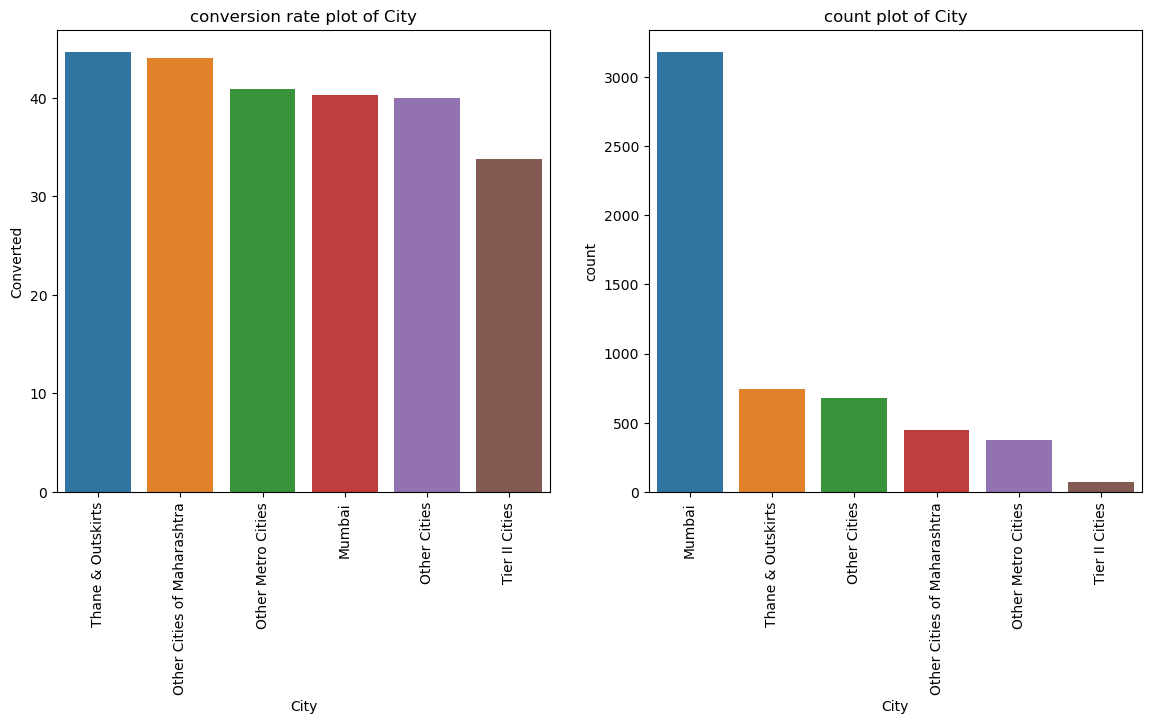

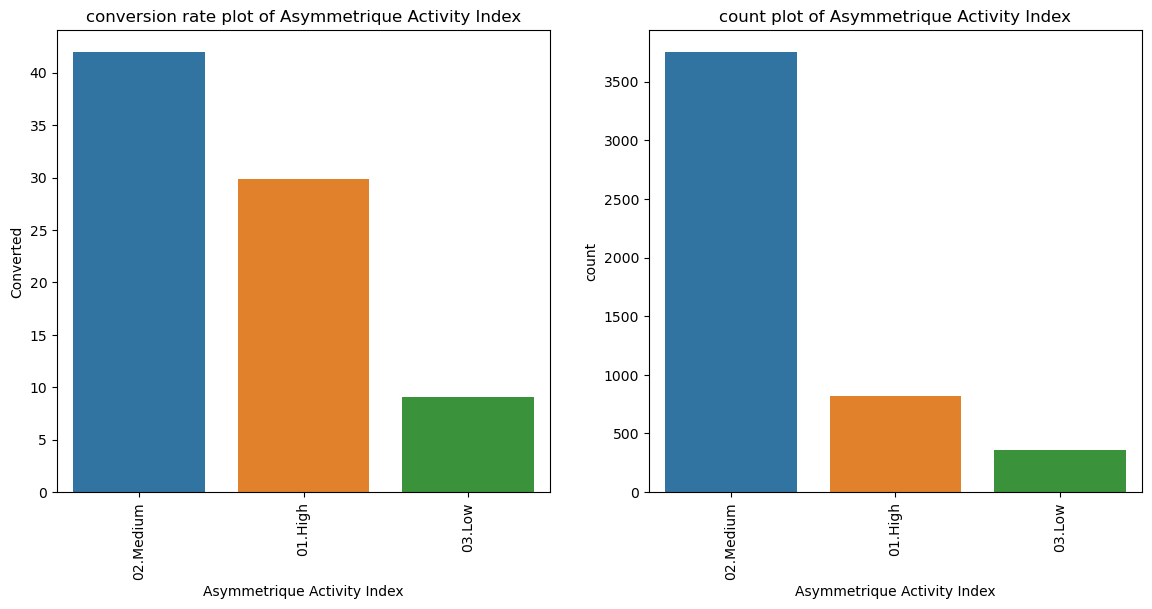

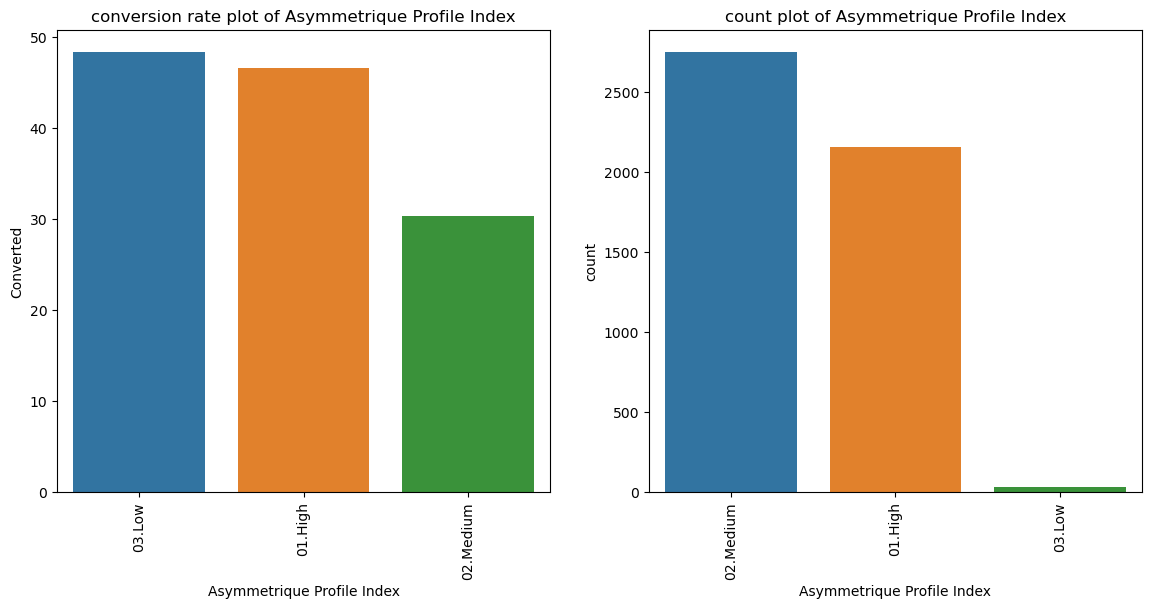

In [27]:
for col in null_obj_cols:
    catplot(lead_data, col)

In [28]:
# Dropping cols for nan values - 'How did you hear about X Education'

# City doesnt show much difference with respect to target variable 'Converted' and can be removed

# Most frequent country is India in the country feature. If we impute nan values of country column with India it doesnt offer any variation. so dropping it

cols_toremove2 = ['How did you hear about X Education','Country', 'City']
lead_data = lead_data.drop(cols_toremove2,axis = 1)

for col in cols_toremove2:
    null_obj_cols.remove(col)

In [29]:
# Identifying null values again

lead_data[null_obj_cols].isnull().sum()/len(lead_data)*100

Lead Source                                       0.318576
Specialization                                   36.295727
What is your current occupation                  29.473800
What matters most to you in choosing a course    29.682522
Tags                                             36.614303
Lead Quality                                     51.949907
Lead Profile                                     74.491926
Asymmetrique Activity Index                      45.787103
Asymmetrique Profile Index                       45.787103
dtype: float64

In [30]:
# imputing null values for each column as a separate category
for col in null_obj_cols:
    lead_data.loc[lead_data[col].isnull(), col] = col+'_null'

# Checking for nan values
lead_data.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Tags                                             0
Lead Quality                                     0
Lead Profile                                     0
Asymmetrique Activity Index                      0
Asymmetrique Profile Index                       0
A free copy of Mastering The Interview           0
Last Notable Activity          

### Removing unique columns and modifying existing columns using EDA

In [31]:
# Categorical needed to be converted into dummies or label encoding
leads_var = lead_data.copy()

# dropping unique id columns 'Prospect ID' and 'Lead Number'
leads_var = leads_var.drop(['Prospect ID', 'Lead Number'], axis = 1)

In [32]:
# last notable activity is adding only one value information (i.e modified) so using modified instead of Last Notable activity
leads_var ["Last Notable Activity_Modified"] = leads_var['Last Notable Activity'].apply(lambda x: 0 if x != 'Modified' else 1)
leads_var = leads_var.drop('Last Notable Activity', axis = 1)

# Grouping the tags column based on EDA

educational_reasons = ['Already a student', 'Diploma holder (Not Eligible)',
       'Graduation in progress', 'Interested  in full time MBA',
       'Interested in other courses', 
       'Not doing further education', 'Recognition issue (DEC approval)','University not recognized']

phone_reasons = ['Ringing','invalid number', 'number not provided', 'opp hangup', 'switched off','wrong number given']

leads_var['Tags'] = leads_var['Tags'].apply(lambda x: x if x not in educational_reasons else 'edu_reasons')

leads_var['Tags'] = leads_var['Tags'].apply(lambda x: x if x not in phone_reasons else 'phone_reasons')

## Data Preparation
### Creating dummy variables for categorical columns

In [33]:
# Identifying numeric columns
numeric_cols =  list(leads_var.select_dtypes(include = 'number').columns)
categorical_cols = list(leads_var.select_dtypes(include = "object").columns)

print('Numeric columns: '+str(len(numeric_cols)))
print('Categorical columns: '+str(len(categorical_cols)))

Numeric columns: 5
Categorical columns: 13


In [34]:
# converting yes to 1 and no to zero for 'A free copy of Mastering The Interview', 'Asymmetrique Profile Index'
binary_cols = ['A free copy of Mastering The Interview', 'Do Not Email']
for col in binary_cols:
    leads_var[col] = leads_var[col].str.lower()
leads_var[binary_cols] = leads_var[binary_cols].replace({'yes': 1, 'no': 0})

In [35]:
# Identifying cols thate are requried for One Hot Encoding (dummy) conversion
dummy_cols = [col for col in categorical_cols if col not in binary_cols]
dummy_cols

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags',
 'Lead Quality',
 'Lead Profile',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index']

In [36]:
# getting dummies for categorical columns thats not been treated and not numerical
# not using "remove first" option, and instead removing the null column in the next cell
dummy_df = pd.get_dummies(leads_var[dummy_cols])
dummy_df.shape 

(9103, 108)

In [37]:
# Removing dummy cals that have values less than 25 ones 
d_cols = list(dummy_df.columns)

# removing null category created for various categorical cols
d_cols = [col for col in d_cols if col.split('_')[-1] != 'null']

dummy_df = dummy_df[d_cols]

# removing categories having value_counts less than 25
new_cols = dummy_df.columns[(dummy_df.sum()>25).values]
dummy_df = dummy_df[new_cols]
dummy_df.shape

(9103, 64)

In [38]:
# concatenating the dummy and other dataframe to obtain the final data frame
leads_final = pd.concat([leads_var[numeric_cols+binary_cols], dummy_df], axis = 1)

In [39]:
leads_final.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Notable Activity_Modified,A free copy of Mastering The Interview,Do Not Email,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,...,Lead Quality_Worst,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Asymmetrique Activity Index_01.High,Asymmetrique Activity Index_02.Medium,Asymmetrique Activity Index_03.Low,Asymmetrique Profile Index_01.High,Asymmetrique Profile Index_02.Medium,Asymmetrique Profile Index_03.Low
0,0,0.0,0,0.0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
1,0,5.0,674,2.5,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
2,1,2.0,1532,2.0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0
3,0,1.0,305,1.0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
4,1,2.0,1428,1.0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0


In [40]:
leads_final.shape

(9103, 71)

In [41]:
# analysing the value counts of each column
cols = list(leads_final.columns)


for col in cols:
    print(col, "\n")
    print(leads_final[col].value_counts(), "\n")

Converted 

0    5642
1    3461
Name: Converted, dtype: int64 

TotalVisits 

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64 

Total Time Spent on Website 

0       2193
60        19
127       18
75        18
74        17
        ... 
609        1
1035       1
802        1
840        1
927        1
Name: Total Time Spent on Website, Length: 1717, dtype: int64 

Page Views Per Visit 

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.

### Spliting the data into test and train set

In [42]:
import sklearn
from sklearn.model_selection import train_test_split

In [43]:
# Cheking the numeric cols and removing 'Last Notable Activity_Modified'
numeric_cols.remove('Last Notable Activity_Modified')

In [44]:
# splitting the test and train data
df_train, df_test = train_test_split(leads_final,train_size = 0.7, random_state = 100)

In [45]:
# Checking the df_train
df_train.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Notable Activity_Modified,A free copy of Mastering The Interview,Do Not Email,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,...,Lead Quality_Worst,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Asymmetrique Activity Index_01.High,Asymmetrique Activity Index_02.Medium,Asymmetrique Activity Index_03.Low,Asymmetrique Profile Index_01.High,Asymmetrique Profile Index_02.Medium,Asymmetrique Profile Index_03.Low
7962,0,3.0,1286,1.5,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
5520,0,7.0,60,7.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1962,0,5.0,169,2.5,1,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1566,1,14.0,1241,3.5,0,0,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0
9170,0,0.0,0,0.0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0


In [46]:
# Checking the df_test
df_test.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Notable Activity_Modified,A free copy of Mastering The Interview,Do Not Email,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,...,Lead Quality_Worst,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Asymmetrique Activity Index_01.High,Asymmetrique Activity Index_02.Medium,Asymmetrique Activity Index_03.Low,Asymmetrique Profile Index_01.High,Asymmetrique Profile Index_02.Medium,Asymmetrique Profile Index_03.Low
3504,0,3.0,424,3.00,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4050,1,0.0,0,0.00,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
7201,0,2.0,712,2.00,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1196,0,4.0,423,4.00,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
8219,1,7.0,247,1.75,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


### Scaling the numeric columns

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
numeric_cols

# removing 'Converted' column from numerical cols
numeric_cols.remove('Converted')

# Initializing the Standarad scaler
scaler = StandardScaler()

# Transforming the numerical cols of the train cols
df_train[numeric_cols] = scaler.fit_transform(df_train[numeric_cols])

y_train = df_train.pop('Converted')

X_train = df_train

In [49]:
numeric_cols

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [50]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Notable Activity_Modified,A free copy of Mastering The Interview,Do Not Email,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Lead Quality_Worst,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Asymmetrique Activity Index_01.High,Asymmetrique Activity Index_02.Medium,Asymmetrique Activity Index_03.Low,Asymmetrique Profile Index_01.High,Asymmetrique Profile Index_02.Medium,Asymmetrique Profile Index_03.Low
7962,-0.092900,1.476324,-0.394072,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
5520,0.695064,-0.771066,2.111481,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1962,0.301082,-0.571257,0.061483,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
1566,2.074000,1.393834,0.517039,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0
9170,-0.683873,-0.881052,-1.077404,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0


In [51]:
y_train.head()

7962    0
5520    0
1962    0
1566    1
9170    0
Name: Converted, dtype: int64

In [52]:
X_train.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Notable Activity_Modified,A free copy of Mastering The Interview,Do Not Email,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Lead Quality_Worst,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Asymmetrique Activity Index_01.High,Asymmetrique Activity Index_02.Medium,Asymmetrique Activity Index_03.Low,Asymmetrique Profile Index_01.High,Asymmetrique Profile Index_02.Medium,Asymmetrique Profile Index_03.Low
count,6.372000e+03,6.372000e+03,6.372000e+03,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,...,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000
mean,5.867787e-17,-3.451588e-17,5.721865e-17,0.357502,0.316855,0.079567,0.391557,0.536566,0.067797,0.004080,...,0.064658,0.052417,0.167451,0.023697,0.089925,0.410860,0.040019,0.236033,0.301475,0.003296
std,1.000078e+00,1.000078e+00,1.000078e+00,0.479302,0.465287,0.270643,0.488137,0.498700,0.251416,0.063752,...,0.245941,0.222884,0.373408,0.152117,0.286096,0.492029,0.196019,0.424676,0.458935,0.057318
min,-6.838726e-01,-8.810520e-01,-1.077404e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-4.868817e-01,-8.645540e-01,-6.218491e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-9.289983e-02,-4.356069e-01,-1.662941e-01,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.010820e-01,8.017404e-01,2.892610e-01,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,4.876085e+01,3.248939e+00,2.397813e+01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Modeling the data using logistic regression

In [53]:
# Import statsmodel library 
import statsmodels.api as sm

In [54]:
# Running the first Logistic Regression Model

logm1 = sm.GLM(y_train, sm.add_constant(X_train), family = sm.families.Binomial())
print(logm1.fit().summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6303
Model Family:                Binomial   Df Model:                           68
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1028.8
Date:                Tue, 21 Nov 2023   Deviance:                       2057.5
Time:                        13:01:04   Pearson chi2:                 8.92e+03
No. Iterations:                   100   Pseudo R-squ. (CS):             0.6339
Covariance Type:            nonrobust                                         
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

So you finally built  first multivariate logistic regression model using all the features present in the dataset. 

`Here, you use the GLM (Generalized Linear Models) method of the library statsmodels`. `'Binomial()' in the 'family' argument tells statsmodels that it needs to fit a logit curve to a binomial data (i.e. in which the target will have just two classes, here 'Converted' and 'Not-Converted').`

This is the summary output for different variables that you got.

In this table, our key focus area is just the different coefficients and their respective p-values. As you can see, there are many variables whose p-values are high, implying that that variable is statistically insignificant. So we need to eliminate some of the variables in order to build a better model.

We'll first eliminate a few features using Recursive Feature Elimination (RFE), and once we have reached a small set of variables to work with, we can then use manual feature elimination (i.e. manually eliminating features based on observing the p-values and VIFs).


### Feature Selection 

So let's start off with the automatic feature selection technique - RFE(Recurssive Feature Elimination).

In [55]:
# Import the Logistic Regression library from sklearn 

from sklearn.linear_model import LogisticRegression

# Instantiate Logistic regression
logreg = LogisticRegression()

In [56]:
# Import the RFE Library from sklearn 

from sklearn.feature_selection import RFE

In [57]:
rfe = RFE(logreg, n_features_to_select = 20)  # Running RFE with 20 variables as output

rfe = rfe.fit(X_train, y_train)

In [58]:
rfe.support_

array([False,  True, False,  True, False,  True, False, False,  True,
       False, False, False, False,  True, False, False, False,  True,
       False, False, False, False, False,  True, False,  True, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False,  True, False, False,
        True, False, False,  True, False, False, False])

In [59]:
# RFE selected 20 features and following is the output
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 41),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 46),
 ('Last Notable Activity_Modified', True, 1),
 ('A free copy of Mastering The Interview', False, 49),
 ('Do Not Email', True, 1),
 ('Lead Origin_API', False, 12),
 ('Lead Origin_Landing Page Submission', False, 10),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 50),
 ('Lead Source_Direct Traffic', False, 22),
 ('Lead Source_Facebook', False, 11),
 ('Lead Source_Google', False, 24),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 23),
 ('Lead Source_Reference', False, 13),
 ('Lead Source_Referral Sites', False, 25),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', False, 6),
 ('Last Activity_Email Bounced', False, 18),
 ('Last Activity_Email Link Clicked', False, 17),
 ('Last Activity_Email Opened', False, 28),
 ('Last Activity_Form Submitted on Website', False, 39),
 ('Last Activity_Olar

In [60]:
col = X_train.columns[rfe.support_]

In [61]:
col

Index(['Total Time Spent on Website', 'Last Notable Activity_Modified',
       'Do Not Email', 'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'Last Activity_Unsubscribed',
       'What matters most to you in choosing a course_Better Career Prospects',
       'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Will revert after reading the email', 'Tags_edu_reasons',
       'Tags_phone_reasons', 'Lead Quality_High in Relevance',
       'Lead Quality_Worst', 'Lead Profile_Student of SomeSchool',
       'Asymmetrique Activity Index_03.Low'],
      dtype='object')

In [62]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead Origin_API',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
  

You can see that the RFE has eliminated some features.
We will take the features selected by RFE and use them to build a model using statsmodel.

In [63]:
# Running the second model 
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6351
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1054.4
Date:                Tue, 21 Nov 2023   Deviance:                       2108.7
Time:                        13:01:08   Pearson chi2:                 8.65e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6310
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                    -2.3871      0.124    -19.293      0.000      -2.630      -2.145
Total Time Spent on Website                                               1.0151      0.066     15.387      0.000       0.886       1.144
Last Notable Activity_Modified                                           -1.2620      0.142     -8.917      0.000      -1.539      -0.985
Do Not Email                                                             -1.2072      0.272     -4.441      0.000      -1.740      -0.674
Lead Origin_Lead Add Form                                                 0.9446      0.395      2.388      0.017       0.169       1.720
Lead Source_Olark Chat                                                    0.9146      0.167      5.461      0.000       0.586       1.243
Lead Source_Welingak Website                                              2.7049      0.829      3.262      0.001       1.080       4.330
Last Activity_Olark Chat Conversation                                    -0.8358      0.257     -3.247      0.001      -1.340      -0.331
Last Activity_SMS Sent                                                    2.0102      0.134     15.000      0.000       1.748       2.273
Last Activity_Unsubscribed                                                1.9201      0.751      2.556      0.011       0.447       3.393
What matters most to you in choosing a course_Better Career Prospects     2.7061      0.159     17.014      0.000       2.394       3.018
Tags_Busy                                                                -1.4545      0.268     -5.425      0.000      -1.980      -0.929
Tags_Closed by Horizzon                                                   4.3835      0.761      5.757      0.000       2.891       5.876
Tags_Lost to EINS                                                         6.5605      0.817      8.033      0.000       4.960       8.161
Tags_Will revert after reading the email                                  2.6079      0.223     11.714      0.000       2.172       3.044
Tags_edu_reasons                                                         -3.6243      0.282    -12.875      0.000      -4.176      -3.073
Tags_phone_reasons                                                       -5.2903      0.258    -20.517      0.000      -5.796      -4.785
Lead Quality_High in Relevance                                            1.0264      0.465      2.205      0.027       0.114       1.939
Lead Quality_Worst                                                       -1.4489      0.755     -1.920      0.055      -2.928       0.030
Lead Profile_Student of SomeSchool             

The feature `"Lead Profile_Student of SomeSchool"` is having high p-value and that the variable is insignificant it is best to drop this feature as it is not helping much with prediction and unnecessarily making the model more complex

In [64]:
col = col.drop('Lead Profile_Student of SomeSchool')
col

Index(['Total Time Spent on Website', 'Last Notable Activity_Modified',
       'Do Not Email', 'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'Last Activity_Unsubscribed',
       'What matters most to you in choosing a course_Better Career Prospects',
       'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Will revert after reading the email', 'Tags_edu_reasons',
       'Tags_phone_reasons', 'Lead Quality_High in Relevance',
       'Lead Quality_Worst', 'Asymmetrique Activity Index_03.Low'],
      dtype='object')

In [65]:
# Running the third model with the selected features
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6352
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1055.6
Date:                Tue, 21 Nov 2023   Deviance:                       2111.2
Time:                        13:01:08   Pearson chi2:                 8.61e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6308
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                    -2.3873      0.124    -19.301      0.000      -2.630      -2.145
Total Time Spent on Website                                               1.0140      0.066     15.399      0.000       0.885       1.143
Last Notable Activity_Modified                                           -1.2639      0.142     -8.930      0.000      -1.541      -0.987
Do Not Email                                                             -1.1962      0.271     -4.406      0.000      -1.728      -0.664
Lead Origin_Lead Add Form                                                 0.9494      0.395      2.406      0.016       0.176       1.723
Lead Source_Olark Chat                                                    0.9100      0.167      5.440      0.000       0.582       1.238
Lead Source_Welingak Website                                              2.6973      0.829      3.254      0.001       1.073       4.322
Last Activity_Olark Chat Conversation                                    -0.8259      0.257     -3.216      0.001      -1.329      -0.323
Last Activity_SMS Sent                                                    2.0129      0.134     15.022      0.000       1.750       2.276
Last Activity_Unsubscribed                                                1.9252      0.752      2.560      0.010       0.451       3.399
What matters most to you in choosing a course_Better Career Prospects     2.7046      0.159     17.002      0.000       2.393       3.016
Tags_Busy                                                                -1.4540      0.268     -5.424      0.000      -1.979      -0.929
Tags_Closed by Horizzon                                                   4.3583      0.761      5.731      0.000       2.868       5.849
Tags_Lost to EINS                                                         6.5251      0.817      7.982      0.000       4.923       8.127
Tags_Will revert after reading the email                                  2.5870      0.222     11.672      0.000       2.153       3.021
Tags_edu_reasons                                                         -3.6336      0.282    -12.875      0.000      -4.187      -3.081
Tags_phone_reasons                                                       -5.2887      0.258    -20.510      0.000      -5.794      -4.783
Lead Quality_High in Relevance                                            1.0407      0.465      2.240      0.025       0.130       1.951
Lead Quality_Worst                                                       -1.8544      0.742     -2.498      0.012      -3.309      -0.399
Asymmetrique Activity Index_03.Low             

In [66]:
# Import the VIF library from statsmodels, outliers_influence package
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [67]:
# Create a dataframe that will contains the names of all the feature variables and their respective VIF's

vif = pd.DataFrame()
vif['features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
9,What matters most to you in choosing a course_...,9.42
13,Tags_Will revert after reading the email,3.91
14,Tags_edu_reasons,3.55
15,Tags_phone_reasons,3.23
3,Lead Origin_Lead Add Form,1.87
11,Tags_Closed by Horizzon,1.79
1,Last Notable Activity_Modified,1.74
4,Lead Source_Olark Chat,1.69
7,Last Activity_SMS Sent,1.63
6,Last Activity_Olark Chat Conversation,1.57


The VIF value should be less than 5. 

The feature `"What matters most to you in choosing a course_Better Career Prospects" `is having a high VIF , So let's drop the variable

In [68]:
col = col.drop('What matters most to you in choosing a course_Better Career Prospects')
col

Index(['Total Time Spent on Website', 'Last Notable Activity_Modified',
       'Do Not Email', 'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'Last Activity_Unsubscribed', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Will revert after reading the email', 'Tags_edu_reasons',
       'Tags_phone_reasons', 'Lead Quality_High in Relevance',
       'Lead Quality_Worst', 'Asymmetrique Activity Index_03.Low'],
      dtype='object')

In [69]:
# Running the Fourth model with the selected features
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6353
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1222.7
Date:                Tue, 21 Nov 2023   Deviance:                       2445.5
Time:                        13:01:09   Pearson chi2:                 8.50e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6109
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.5693      0.096    -16.278      0.000      -1.758      -1.380
Total Time Spent on Website                  1.0529      0.061     17.269      0.000       0.933       1.172
Last Notable Activity_Modified              -1.4875      0.132    -11.263      0.000      -1.746      -1.229
Do Not Email                                -0.9142      0.248     -3.679      0.000      -1.401      -0.427
Lead Origin_Lead Add Form                    1.8150      0.403      4.499      0.000       1.024       2.606
Lead Source_Olark Chat                       1.2076      0.150      8.053      0.000       0.914       1.501
Lead Source_Welingak Website                 3.7774      0.830      4.548      0.000       2.150       5.405
Last Activity_Olark Chat Conversation       -0.8724      0.236     -3.704      0.000      -1.334      -0.411
Last Activity_SMS Sent                       1.8744      0.119     15.744      0.000       1.641       2.108
Last Activity_Unsubscribed                   0.9879      0.727      1.359      0.174      -0.437       2.413
Tags_Busy                                    0.5194      0.236      2.199      0.028       0.056       0.982
Tags_Closed by Horizzon                      6.0729      0.747      8.131      0.000       4.609       7.537
Tags_Lost to EINS                            6.6383      0.764      8.689      0.000       5.141       8.136
Tags_Will revert after reading the email     4.4879      0.197     22.783      0.000       4.102       4.874
Tags_edu_reasons                            -1.7831      0.260     -6.857      0.000      -2.293      -1.273
Tags_phone_reasons                          -3.3679      0.221    -15.219      0.000      -3.802      -2.934
Lead Quality_High in Relevance               1.1934      0.481      2.484      0.013       0.252       2.135
Lead Quality_Worst                          -1.7233      0.676     -2.548      0.011      -3.049      -0.398
Asymmetrique Activity Index_03.Low          -1.7454      0.446     -3.911      0.000      -2.620      -0.871
============================================================================================================
"""

In [70]:
# Checking VIF

vif = pd.DataFrame()
vif['features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
3,Lead Origin_Lead Add Form,1.85
13,Tags_edu_reasons,1.82
1,Last Notable Activity_Modified,1.74
12,Tags_Will revert after reading the email,1.72
4,Lead Source_Olark Chat,1.62
6,Last Activity_Olark Chat Conversation,1.57
7,Last Activity_SMS Sent,1.57
16,Lead Quality_Worst,1.55
10,Tags_Closed by Horizzon,1.45
0,Total Time Spent on Website,1.44


The feature `"Last Activity_Unsubscribed"` is having a high p-value which is insignificant. Let's drop the variable

In [71]:
col = col.drop('Last Activity_Unsubscribed')
col

Index(['Total Time Spent on Website', 'Last Notable Activity_Modified',
       'Do Not Email', 'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Will revert after reading the email',
       'Tags_edu_reasons', 'Tags_phone_reasons',
       'Lead Quality_High in Relevance', 'Lead Quality_Worst',
       'Asymmetrique Activity Index_03.Low'],
      dtype='object')

In [72]:
# Running the Fifth model with the selected features
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6354
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1223.6
Date:                Tue, 21 Nov 2023   Deviance:                       2447.1
Time:                        13:01:09   Pearson chi2:                 8.41e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6108
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.5628      0.096    -16.251      0.000      -1.751      -1.374
Total Time Spent on Website                  1.0522      0.061     17.273      0.000       0.933       1.172
Last Notable Activity_Modified              -1.4925      0.132    -11.311      0.000      -1.751      -1.234
Do Not Email                                -0.8330      0.238     -3.495      0.000      -1.300      -0.366
Lead Origin_Lead Add Form                    1.8046      0.403      4.481      0.000       1.015       2.594
Lead Source_Olark Chat                       1.2038      0.150      8.035      0.000       0.910       1.497
Lead Source_Welingak Website                 3.7684      0.830      4.540      0.000       2.142       5.395
Last Activity_Olark Chat Conversation       -0.8757      0.235     -3.719      0.000      -1.337      -0.414
Last Activity_SMS Sent                       1.8632      0.119     15.712      0.000       1.631       2.096
Tags_Busy                                    0.5181      0.236      2.197      0.028       0.056       0.980
Tags_Closed by Horizzon                      6.0712      0.747      8.127      0.000       4.607       7.535
Tags_Lost to EINS                            6.6208      0.763      8.681      0.000       5.126       8.116
Tags_Will revert after reading the email     4.4926      0.197     22.779      0.000       4.106       4.879
Tags_edu_reasons                            -1.7853      0.260     -6.867      0.000      -2.295      -1.276
Tags_phone_reasons                          -3.3661      0.221    -15.216      0.000      -3.800      -2.933
Lead Quality_High in Relevance               1.1980      0.480      2.498      0.013       0.258       2.138
Lead Quality_Worst                          -1.7252      0.678     -2.545      0.011      -3.054      -0.396
Asymmetrique Activity Index_03.Low          -1.6954      0.442     -3.832      0.000      -2.562      -0.828
============================================================================================================
"""

In [73]:
# Checking VIF

vif = pd.DataFrame()
vif['features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
3,Lead Origin_Lead Add Form,1.85
12,Tags_edu_reasons,1.82
1,Last Notable Activity_Modified,1.73
11,Tags_Will revert after reading the email,1.72
4,Lead Source_Olark Chat,1.62
6,Last Activity_Olark Chat Conversation,1.57
7,Last Activity_SMS Sent,1.57
15,Lead Quality_Worst,1.55
9,Tags_Closed by Horizzon,1.45
0,Total Time Spent on Website,1.44


`Now all the features with p-values and VIF's are significant and the values are within the range where p-values are < 0.05 and VIF < 5.`

In [74]:
# Getting the predicted values on the train dataset
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred

array([0.1805941 , 0.13517944, 0.00571327, ..., 0.99261885, 0.98199821,
       0.00366531])

In [75]:
y_train_pred[:10]

array([0.1805941 , 0.13517944, 0.00571327, 0.98782777, 0.04430885,
       0.21653287, 0.03746176, 0.92484379, 0.64043409, 0.99503899])

`Now, the logistic regression curve gives you the probabilities of Converted and Not converted. You can get these probabilities by simply using the 'predict' function as shown above.`

#### Creating a dataframe with the actual Converted flag and the predicted probabilities

`Since the logistic curve gives you just the probabilities and not the actual classification of 'Converted' and 'Not-Converted', you need to find a threshold probability to classify customers as 'converted' and 'not-converted'.`

In [76]:
y_train_pred_final = pd.DataFrame({'Converted': y_train.values, 'Converted_prob': y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final

,Converted,Converted_prob,Prospect ID
0,0,0.180594,7962
1,0,0.135179,5520
2,0,0.005713,1962
3,1,0.987828,1566
4,0,0.044309,9170
...,...,...,...
6367,0,0.081513,367
6368,1,0.961082,82
6369,1,0.992619,8173
6370,1,0.981998,7055


##### Creating new column 'Predicted' with 1 if Converted_Prob > 0.5 else 0

`Here, we choose 0.5 as an arbitrary cutoff wherein if the probability of a particular prospect converted is less than 0.5, you'd classify it as 'Not-Converted' and if it's greater than 0.5, you'd classify it as 'Converted'. `

`The choice of 0.5 is completely arbitrary at this stage and we will find the optimal cutoff in 'Model Evaluation', but for now, we'll move forward with 0.5 as the cutoff.`

In [77]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x:1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.180594,7962,0
1,0,0.135179,5520,0
2,0,0.005713,1962,0
3,1,0.987828,1566,1
4,0,0.044309,9170,0


### Model Evaluation using Metrics

### Confusion Matrix and Accuracy

The chosen probability cutoff is 0.5 in order to classify the customers into 'Converted' and 'Not-Converted'. Now, classifying the customers into two classes, obviously we will have some errors. 

The classes of errors that would be there are:

-  'Converted' customers being (incorrectly) classified as 'Not-Converted'
-  'Not-Converted' customers being (incorrectly) classified as 'Converted'
 

To capture these errors, and to evaluate how well the model is, you'll use something known as the 'Confusion Matrix'.

In [78]:
from sklearn import metrics

In [79]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
confusion

array([[3784,  169],
       [ 294, 2125]], dtype=int64)

In [80]:
# Predicted     not_converted    converted
# Actual
# not_converted      3784(TN)    169(FP)
# converted          294(FN)     2125(TP) 

This table shows a comparison of the predicted and actual labels. The actual labels are along the vertical axis, while the predicted labels are along the horizontal axis. Thus, the second row and first column (294) is the number of customers who have actually ‘converted’ but the model has predicted them as not-converted.

Similarly, the cell at the second row, the second column (2125) is the number of customers who are actually ‘converted’ and also predicted as ‘converted’.

From the table above, the correctly predicted labels are contained in the first row and first column, and the last row and last column.

In [81]:
# Check the overall accuracy

print(round(100*(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)),2))

92.73


### Metrics beyond Accuracy

In [82]:
TP = confusion[1,1]  # True Positive
TN = confusion[0,0]  # True Negative
FP = confusion[0,1]  # False Positive
FN = confusion[1,0]  # False Negative

In [83]:
# Let's calculate the sensitivity of our logistic regression model
TP / float(FP + TP)

0.9263295553618134

In [84]:
# Let's calculate the specificity of our logistic regression model
TN / float(TN + FP)

0.9572476600050595

In [85]:
# Calculate the false positive rate - Predicting Converted when the customer does not converted
FP / float(TN + FP)

0.042752339994940554

In [86]:
# Calculate the true positive rate 
TP / float(TP + FN)

0.8784621744522529

In [87]:
# Calculate Positive predictive value
TP / float(FP + TP)

0.9263295553618134

In [88]:
# Calculate the Negative predictive value
TN / float(FN + TN)

0.9279058361942129

### ROC Curve

In [89]:
# Defining the function to plot the ROC curve

def roc_plot(actual, prob):
    fpr, tpr, thresholds = metrics.roc_curve(actual, prob, drop_intermediate=False)
    # fpr - false positive rate, 
    # tpr - true positive rate
    auc_score = metrics.roc_auc_score(actual, prob)
    # auc - area under the curve
    plt.figure(figsize=(8,5))
    plt.plot([0,1], [0,1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f)' % auc_score)
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characterisitics (ROC)')
    plt.legend(loc = "lower right")
    plt.show()
    
    return None
    
    

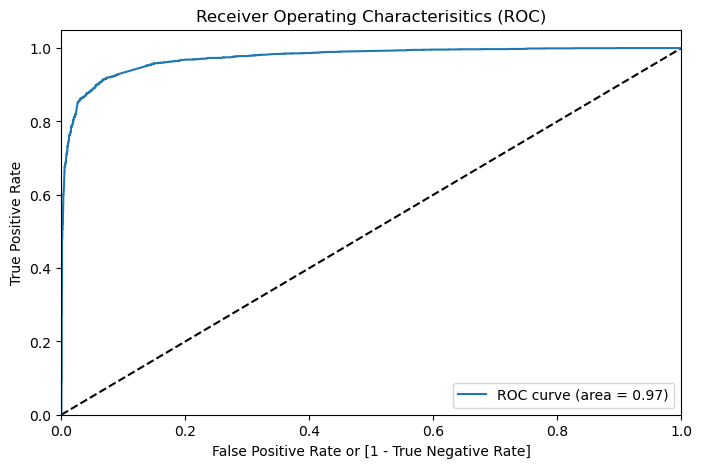

In [90]:
roc_plot(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

An ROC(Receiver Operating Characteristics) curve demonstrates several things :

-  It shows the tradeoff between Sensitivity and Specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
-  The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
-  The closer the curve comes to the 45 degrees diagonal of the ROC space, the less accurate the test.


### Finding the Optimal cutoff threshold point

The ROC curve essentially shows you a trade-off between the sensitivity and specificity.

Optimal cutoff probability is the probability that we get balanced Sensitivity and specificity

In [91]:
# Let's create columns with different probability cutoffs

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.180594,7962,0,1,1,0,0,0,0,0,0,0,0
1,0,0.135179,5520,0,1,1,0,0,0,0,0,0,0,0
2,0,0.005713,1962,0,1,0,0,0,0,0,0,0,0,0
3,1,0.987828,1566,1,1,1,1,1,1,1,1,1,1,1
4,0,0.044309,9170,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6367,0,0.081513,367,0,1,0,0,0,0,0,0,0,0,0
6368,1,0.961082,82,1,1,1,1,1,1,1,1,1,1,1
6369,1,0.992619,8173,1,1,1,1,1,1,1,1,1,1,1
6370,1,0.981998,7055,1,1,1,1,1,1,1,1,1,1,1


In [92]:
# Let's calculate the Accuracy, Sensitivity and Specificity for various probability cutoff's

cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensitivity', 'specificity'])

from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    conf_mat = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])
    total = sum(sum(conf_mat))
    accuracy = (conf_mat[0,0] + conf_mat[1,1]) / total
    sensitivity = (conf_mat[1,1] / (conf_mat[1,0] + conf_mat[1,1]))
    specificity = (conf_mat[0,0] / (conf_mat[0,0] + conf_mat[0,1]))
    cutoff_df.loc[i] = [i, accuracy, sensitivity, specificity]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.379630     1.000000     0.000000
0.1   0.1  0.827684     0.974783     0.737668
0.2   0.2  0.894382     0.952873     0.858588
0.3   0.3  0.923729     0.916494     0.928156
0.4   0.4  0.926711     0.900785     0.942575
0.5   0.5  0.927338     0.878462     0.957248
0.6   0.6  0.927652     0.856966     0.970908
0.7   0.7  0.914626     0.807358     0.980268
0.8   0.8  0.903955     0.771807     0.984822
0.9   0.9  0.887790     0.719719     0.990640


The key takeaway from this code is the accuracy, sensitivity, and specificity values which have been calculated using the appropriate elements in the confusion matrix. 

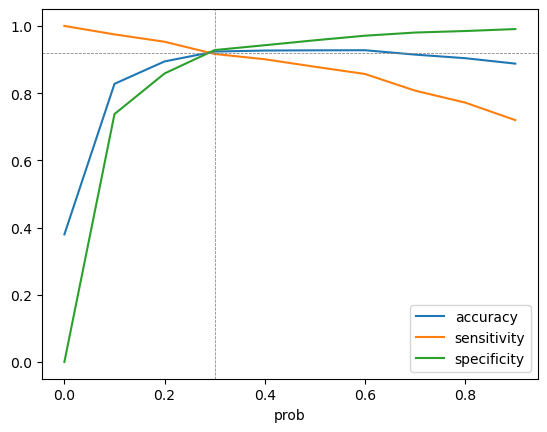

In [93]:
# Let's plot the accuracy, sensitivity, specificity for various probabilities
cutoff_df.plot.line(x = 'prob', y = ['accuracy','sensitivity','specificity'])
plt.axvline(x=0.3, color='grey',linewidth=0.55, linestyle='--')
plt.axhline(y=0.92, color='grey',linewidth=0.55, linestyle='--')

From the plot, it was understood that when the probability thresholds are very low, the sensitivity is very high and specificity is very low. Similarly, for larger probability thresholds, the sensitivity values are getting low but the specificity values are very high. And at about 0.3, the three metrics seem to be almost equal with decent values and hence, we choose 0.3 as the optimal cut-off point. The graph also showcases that at about 0.3, the three metrics intersect.

From the plot, at about a threshold of 0.3, the curves of accuracy, sensitivity and specificity intersect, and they all take a value of around 91.6% to 92.8%.`


#### From the curve above, 0.3 is the optimum threshold point to take it as a cutoff probability.

Now in order to assess the model, re-run the predictions on the train set using the cutoff of 0.3

In [94]:
y_train_pred_final['Final_predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)
y_train_pred_final

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_predicted
0,0,0.180594,7962,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.135179,5520,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.005713,1962,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.987828,1566,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.044309,9170,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6367,0,0.081513,367,0,1,0,0,0,0,0,0,0,0,0,0
6368,1,0.961082,82,1,1,1,1,1,1,1,1,1,1,1,1
6369,1,0.992619,8173,1,1,1,1,1,1,1,1,1,1,1,1
6370,1,0.981998,7055,1,1,1,1,1,1,1,1,1,1,1,1


In [95]:
# Let's check the overall accuracy

accuracy = round(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Final_predicted)*100,2)
accuracy

92.37

In [96]:
conf_matrix_1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Final_predicted)
conf_matrix_1

array([[3669,  284],
       [ 202, 2217]], dtype=int64)

In [97]:
TP = conf_matrix_1[1,1]   # True Positive
TN = conf_matrix_1[0,0]   # True Negative
FP = conf_matrix_1[0,1]   # False Positive
FN = conf_matrix_1[1,0]   # False Negative

In [98]:
# Let's calculate the sensitivity of our logistic regression model
sensitivity = round(TP / float(TP + FN)*100,2)
sensitivity

91.65

In [99]:
# Let's calculate the specificity of our logistic regression model
specificity = round(TN / float(TN + FP)*100,2)
specificity

92.82

In [100]:
# Calculate false positive rate - Predicting converted when customer not actually converted
fpr = round(FP / float(TN + FP)*100,2)
fpr

7.18

In [101]:
# Positive predictive value
round(TP / float(TP + FP)*100,2)

88.64

In [102]:
# Negative predictive value
round(TN / float(TN + FN)*100,2)

94.78

Now apart from Sensitivity and Specificity there are two more metrics that are widely used. They are 

1. Precision
2. Recall

These metrics are very similar to Sensitivity and specificity. Precision is same as the 'Positive predictive value' and Recall is exactly same as the Sensitivity.

#### Precision and Recall

In [103]:
# Using sklearn utilities for Precision and Recall

from sklearn.metrics import precision_score, recall_score

The Precision and Recall is calculated based on the optimal threshold of 0.3 

In [104]:
precision = round(metrics.precision_score(y_train_pred_final.Converted, y_train_pred_final.Final_predicted)*100,2)
precision

88.64

In [105]:
recall = round(metrics.recall_score(y_train_pred_final.Converted, y_train_pred_final.Final_predicted)*100,2)
recall

91.65

In [106]:
y_train_pred_final.Converted, y_train_pred_final.Final_predicted

(0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6367    0
 6368    1
 6369    1
 6370    1
 6371    0
 Name: Converted, Length: 6372, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6367    0
 6368    1
 6369    1
 6370    1
 6371    0
 Name: Final_predicted, Length: 6372, dtype: int64)

In [107]:
# Precision and Recall Tradeoff

from sklearn.metrics import precision_recall_curve

In [108]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Final_predicted)

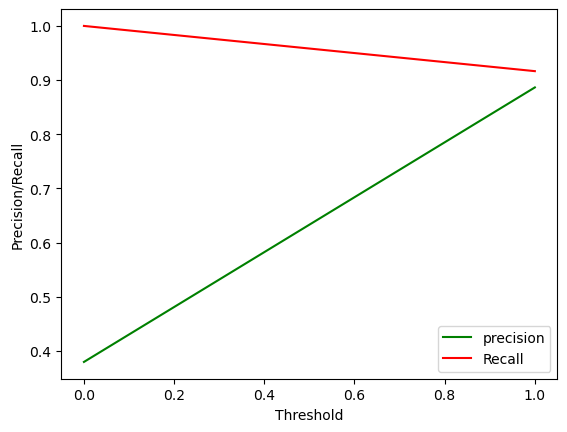

In [109]:
plt.plot(thresholds, p[:-1], 'g-', label = 'precision')  # Precision
plt.plot(thresholds, r[:-1], 'r-', label = 'Recall')  # Recall

# add legend and axis labels

plt.legend(loc='lower right')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')

plt.show()


From the Precision and Recall curve, the curve is similar to what you got for sensitivity and specificity. Here both the precision and Recall are not intersecting at any point. when the probability thresholds are very low, the recall is very high and precision is very low. Similarly, for larger probability thresholds, the recall values are getting low but the precision values are very high. 

So the model evaluation on the train set is complete and the model seems to be doing a decent job. As we have seen two views of the evaluation metrics - one was the sensitivity-specificity view, and the other was the precision-recall view.

### To find the optimal probability where the target lead conversion rate to be arround 80% we have considered the optimal threshold as 0.7

In [110]:
y_train_pred_final['Final_predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.7 else 0)
y_train_pred_final

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_predicted
0,0,0.180594,7962,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.135179,5520,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.005713,1962,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.987828,1566,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.044309,9170,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6367,0,0.081513,367,0,1,0,0,0,0,0,0,0,0,0,0
6368,1,0.961082,82,1,1,1,1,1,1,1,1,1,1,1,1
6369,1,0.992619,8173,1,1,1,1,1,1,1,1,1,1,1,1
6370,1,0.981998,7055,1,1,1,1,1,1,1,1,1,1,1,1


In [111]:
# Let's check the overall accuracy

accuracy = round(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Final_predicted)*100,2)
accuracy

91.46

In [112]:
conf_matrix_2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Final_predicted)
conf_matrix_2

array([[3875,   78],
       [ 466, 1953]], dtype=int64)

In [113]:
TP = conf_matrix_2[1,1]   # True Positive
TN = conf_matrix_2[0,0]   # True Negative
FP = conf_matrix_2[0,1]   # False Positive
FN = conf_matrix_2[1,0]   # False Negative

In [114]:
# Let's calculate the sensitivity of our logistic regression model
sensitivity = round(TP / float(TP + FN)*100,2)
sensitivity

80.74

In [115]:
# Let's calculate the specificity of our logistic regression model
specificity = round(TN / float(TN + FP)*100,2)
specificity

98.03

In [116]:
# Calculate false positive rate - Predicting converted when customer not actually converted
fpr = round(FP / float(TN + FP)*100,2)
fpr

1.97

In [117]:
# Positive predictive value
round(TP / float(TP + FP)*100,2)

96.16

In [118]:
# Negative predictive value
round(TN / float(TN + FN)*100,2)

89.27

The precision and Recall metric is calculated based on the optimal threshold of 0.7

In [119]:
precision = round(metrics.precision_score(y_train_pred_final.Converted, y_train_pred_final.Final_predicted)*100,2)
precision

96.16

In [120]:
recall = round(metrics.recall_score(y_train_pred_final.Converted, y_train_pred_final.Final_predicted)*100,2)
recall

80.74

In [121]:
# Precision and Recall Tradeoff

from sklearn.metrics import precision_recall_curve

In [122]:
y_train_pred_final.Converted, y_train_pred_final.Final_predicted

(0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6367    0
 6368    1
 6369    1
 6370    1
 6371    0
 Name: Converted, Length: 6372, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6367    0
 6368    1
 6369    1
 6370    1
 6371    0
 Name: Final_predicted, Length: 6372, dtype: int64)

In [123]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Final_predicted)

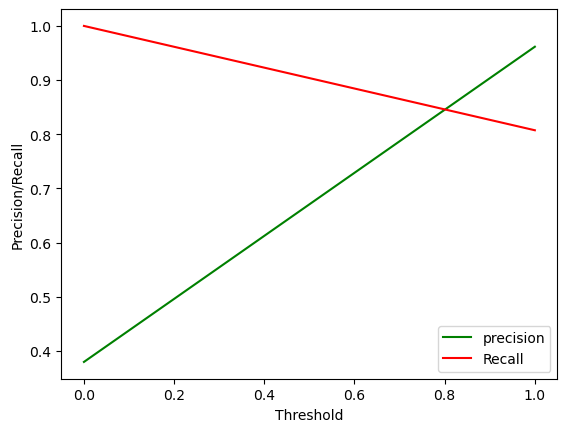

In [124]:
plt.plot(thresholds, p[:-1], 'g-', label = 'precision')  # Precision
plt.plot(thresholds, r[:-1], 'r-', label = 'Recall')  # Recall

# add legend and axis labels

plt.legend(loc='lower right')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')

plt.show()


From the Precision and Recall curve, the curve is similar to what you got for sensitivity and specificity. Here both the precision and Recall are intersecting between 0.6 and 0.8 . when the probability thresholds are very low, the recall is very high and precision is very low. Similarly, for larger probability thresholds, the recall values are getting low but the precision values are very high.

So the model evaluation on the train set is complete and the model seems to be doing a decent job. As we have seen two views of the evaluation metrics - one was the sensitivity-specificity view, and the other was the precision-recall view.

In [125]:
# Lets add Lead Score 

y_train_pred_final['Lead_Score'] = y_train_pred_final['Converted_prob'].map( lambda x: round(x*100))
y_train_pred_final

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_predicted,Lead_Score
0,0,0.180594,7962,0,1,1,0,0,0,0,0,0,0,0,0,18
1,0,0.135179,5520,0,1,1,0,0,0,0,0,0,0,0,0,14
2,0,0.005713,1962,0,1,0,0,0,0,0,0,0,0,0,0,1
3,1,0.987828,1566,1,1,1,1,1,1,1,1,1,1,1,1,99
4,0,0.044309,9170,0,1,0,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6367,0,0.081513,367,0,1,0,0,0,0,0,0,0,0,0,0,8
6368,1,0.961082,82,1,1,1,1,1,1,1,1,1,1,1,1,96
6369,1,0.992619,8173,1,1,1,1,1,1,1,1,1,1,1,1,99
6370,1,0.981998,7055,1,1,1,1,1,1,1,1,1,1,1,1,98


In [126]:
y_train_pred_final = y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9], axis = 1)

In [127]:
y_train_pred_final

,Converted,Converted_prob,Prospect ID,Predicted,Final_predicted,Lead_Score
0,0,0.180594,7962,0,0,18
1,0,0.135179,5520,0,0,14
2,0,0.005713,1962,0,0,1
3,1,0.987828,1566,1,1,99
4,0,0.044309,9170,0,0,4
...,...,...,...,...,...,...
6367,0,0.081513,367,0,0,8
6368,1,0.961082,82,1,1,96
6369,1,0.992619,8173,1,1,99
6370,1,0.981998,7055,1,1,98


### Test Set Prediction

In [128]:
## allocating x and y test data from dataframe
y_test = df_test.pop('Converted')

X_test = df_test

In [129]:
## scaling in test data
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [130]:
## adding constant to X test data 
X_test_sm = sm.add_constant(X_test[col])

In [131]:
## Predict on test data using the finalised model 
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3504    0.006444
4050    0.998961
7201    0.030697
1196    0.006432
8219    0.990121
8747    0.216533
9048    0.505404
6524    0.004339
7693    0.010538
8187    0.100828
dtype: float64

In [132]:
# Converting y_pred to a dataframe 
y_pred_test = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# adding prospect ID to y test dataframe
y_test_df['Prospect ID'] = y_test_df.index

In [133]:
# Removing index for both dataframes to append them side by side 
y_pred_test.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [134]:
# Appending y_test_df and y_pred_test 
y_pred_final = pd.concat([y_test_df, y_pred_test],axis=1)
# Renaming the column with 0 to 'converted_prob' column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [135]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,3504,0.006444
1,1,4050,0.998961
2,0,7201,0.030697
3,0,1196,0.006432
4,1,8219,0.990121


In [136]:
# Now in order to assess the model, we run the predictions on the test set using the same cutoff of 0.3 as done on train set
y_pred_final['final_test_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [137]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob,final_test_predicted
0,0,3504,0.006444,0
1,1,4050,0.998961,1
2,0,7201,0.030697,0
3,0,1196,0.006432,0
4,1,8219,0.990121,1


In [138]:
# Test pred accuracy score
accuracy = round(metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_test_predicted)*100,2)
accuracy

92.71

In [139]:
## confusion matrix calculated to access the performance of model on test data.
conf_matrix_3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_test_predicted )
conf_matrix_3

array([[1570,  119],
       [  80,  962]], dtype=int64)

In [140]:
TP = conf_matrix_3[1,1] # true positive 
TN = conf_matrix_3[0,0] # true negatives
FP = conf_matrix_3[0,1] # false positives
FN = conf_matrix_3[1,0] # false negatives

In [141]:
# sensitivity calculated based on above matrix 
sensitivity = round((TP / float(TP+FN))*100,2)
sensitivity

92.32

In [142]:
# specificity calculated based on above matrix 
specificity = round((TN / float(TN+FP))*100,2)
specificity

92.95

### Conclusion based on matrix
##### Sensitivity - 92.32 (The proportion of correctly predicted positive observations out of the total actual positives)
##### specificity - 92.95 (The proportion of correctly predicted negative observations out of the total actual negatives)

##### Based on the above we understand that our model is able to predict (actually)converted as (predicited)converted for more than 90% 
##### This shows that the model is performing well and has higher accuracy all together

In [143]:
# Now in order to assess the model, we run the predictions on the test set using the same cutoff of 0.7 as done on train set
y_pred_final['final_test_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.7 else 0)

In [144]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob,final_test_predicted
0,0,3504,0.006444,0
1,1,4050,0.998961,1
2,0,7201,0.030697,0
3,0,1196,0.006432,0
4,1,8219,0.990121,1


In [145]:
# Test pred accuracy score
accuracy = round(metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_test_predicted)*100,2)
accuracy

91.32

In [146]:
## confusion matrix calculated to access the performance of model on test data.
conf_matrix_4 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_test_predicted )
conf_matrix_4

array([[1656,   33],
       [ 204,  838]], dtype=int64)

In [147]:
TP = conf_matrix_4[1,1] # true positive 
TN = conf_matrix_4[0,0] # true negatives
FP = conf_matrix_4[0,1] # false positives
FN = conf_matrix_4[1,0] # false negatives

In [148]:
# sensitivity calculated based on above matrix 
sensitivity = round((TP / float(TP+FN))*100,2)
sensitivity

80.42

In [149]:
# specificity calculated based on above matrix 
specificity = round((TN / float(TN+FP))*100,2)
specificity

98.05

### Conclusion based on matrix
##### Sensitivity - 80.42 (The proportion of correctly predicted positive observations out of the total actual positives)
##### specificity - 98.05 (The proportion of correctly predicted negative observations out of the total actual negatives)

##### Based on the above we understand that our model is able to predict (actually)converted as (predicited)converted for more than 90% 
##### This shows that the model is performing well and has higher accuracy all together

### Lead Score on Test Data

In [150]:
# making new df with lead score column for each prospect ID
lead_scorer_df=pd.DataFrame()
df1=y_train_pred_final[['Prospect ID','Converted_prob']]
df2=y_pred_final[['Prospect ID','Converted_prob']]

In [151]:
## Joining the data frame
lead_scorer_df=df1.append(df2,ignore_index=True)
lead_scorer_df.head()

,Prospect ID,Converted_prob
0,7962,0.180594
1,5520,0.135179
2,1962,0.005713
3,1566,0.987828
4,9170,0.044309


In [152]:
## Formatting the column to have readible numbers
lead_scorer_df['Lead Score']=lead_scorer_df['Converted_prob'].apply(lambda x: round((x*100),2))

In [153]:
## Dropping converted prob
lead_scorer_df.drop('Converted_prob',1,inplace=True)

# Final leadscores for each prospect ID
lead_scorer_df.head()

,Prospect ID,Lead Score
0,7962,18.06
1,5520,13.52
2,1962,0.57
3,1566,98.78
4,9170,4.43


In [154]:
hot_leads = lead_scorer_df[lead_scorer_df['Lead Score'] >=  80]
hot_leads

,Prospect ID,Lead Score
3,1566,98.78
7,309,92.48
9,1050,99.50
14,2912,99.81
28,2914,99.76
...,...,...
9093,4208,99.93
9096,8348,95.90
9097,4628,87.16
9101,8043,93.63


`As per the Business requirement the hot leads are identified and lead score is assigned to each of the potential leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance from the model by predicting the probabilities and  there are 2757 hot leads where the sales team can followup and convert to paying customers.`
